<a href="https://colab.research.google.com/github/kostas696/My_Latest_Projects/blob/main/Project_Predictive_Modeling_for_Disease_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Predictive Modeling for Disease Diagnosis**

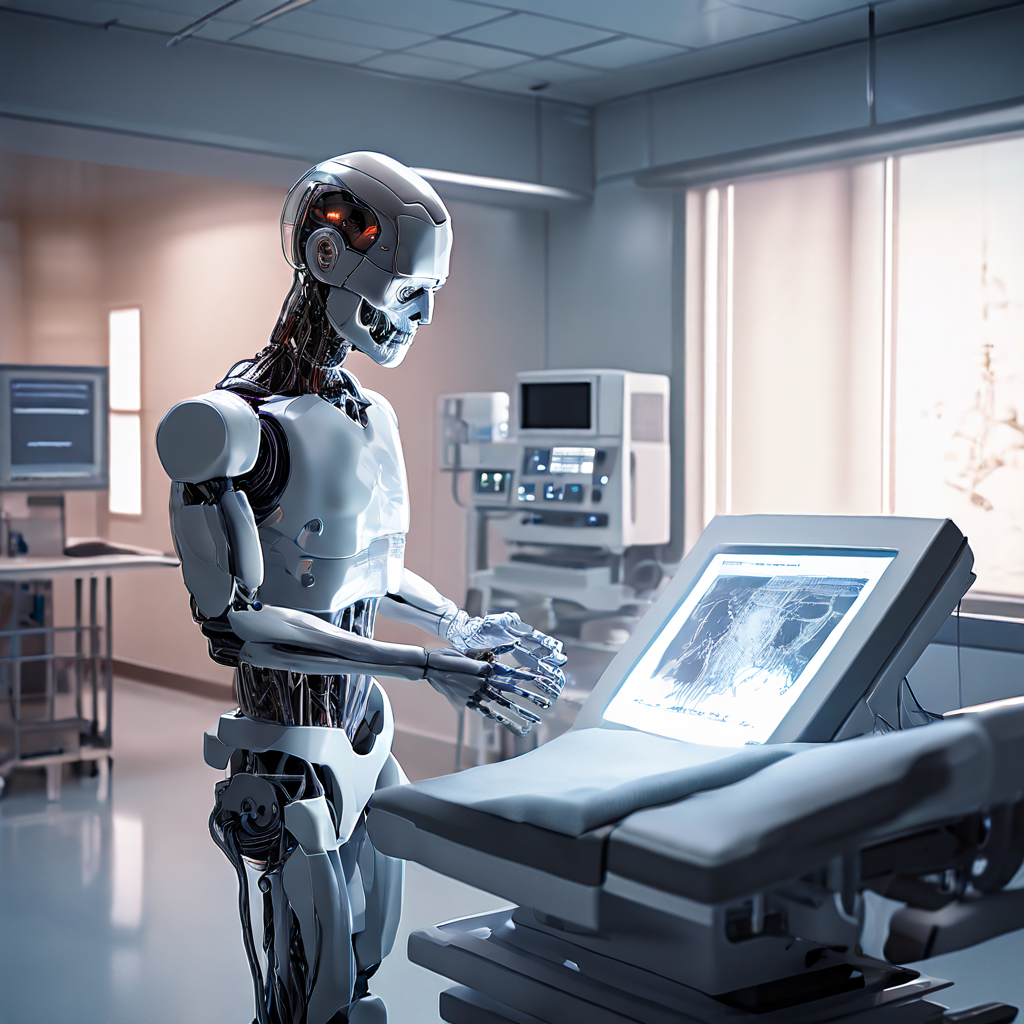

## Introduction

In modern healthcare, early detection and accurate diagnosis of diseases are critical for effective treatment and management. Traditional diagnostic methods often rely on invasive procedures and subjective assessments. However, the advent of predictive modeling using machine learning offers a promising avenue for enhancing disease diagnosis by leveraging vast amounts of health-related data. This project aims to develop a predictive model capable of accurately classifying individuals into diseased or non-diseased categories based on their health attributes, thereby assisting healthcare professionals in timely intervention and patient management.

## Objective

The objective of this project is to create a robust predictive model for disease diagnosis using machine learning techniques. By analyzing a comprehensive dataset containing various health-related attributes, including cholesterol levels, blood cell counts, hormone levels, and physiological measurements, the goal is to develop a tool that can accurately predict the likelihood of an individual having a specific disease. The ultimate aim is to assist healthcare providers in early disease detection, prognosis, and personalized patient care.

## Dataset Information

The dataset utilized in this project comprises a diverse set of health-related attributes collected from individuals, along with binary indicators denoting disease status (1 for diseased, 0 for non-diseased). The attributes encompass a wide range of physiological parameters, including cholesterol levels, blood cell counts, hormonal profiles, and cardiovascular markers. Each observation in the dataset represents an individual case, with accompanying measurements and disease status labels. The dataset offers a rich source of information for training and evaluating predictive models for disease diagnosis.

The dataset consists of the following attributes:
- **Cholesterol**: Level of cholesterol in the blood (mg/dL)
- **Hemoglobin**: Protein in red blood cells carrying oxygen
- **Platelets**: Blood cells aiding in clotting
- **White Blood Cells (WBC)**: Immune system cells fighting infections
- **Red Blood Cells (RBC)**: Cells carrying oxygen
- **Hematocrit**: Percentage of blood volume occupied by RBC
- **Mean Corpuscular Volume (MCV)**: Average volume of RBC
- **Mean Corpuscular Hemoglobin (MCH)**: Average amount of hemoglobin in RBC
- **Mean Corpuscular Hemoglobin Concentration (MCHC)**: Average concentration of hemoglobin in RBC
- **Insulin**: Hormone regulating blood sugar levels
- **BMI (Body Mass Index)**: Measure of body fat based on height and weight
- **Systolic Blood Pressure (SBP)**: Pressure in arteries during heartbeats
- **Diastolic Blood Pressure (DBP)**: Pressure in arteries at rest between beats
- **Triglycerides**: Type of fat found in blood (mg/dL)
- **HbA1c (Glycated Hemoglobin)**: Measure of average blood sugar levels over past 2-3 months
- **LDL (Low-Density Lipoprotein) Cholesterol**: "Bad" cholesterol
- **HDL (High-Density Lipoprotein) Cholesterol**: "Good" cholesterol
- **ALT (Alanine Aminotransferase)**: Liver enzyme
- **AST (Aspartate Aminotransferase)**: Enzyme found in liver and heart
- **Heart Rate**: Number of heartbeats per minute (bpm)
- **Creatinine**: Waste product produced by muscles and filtered by kidneys
- **Troponin**: Protein released into bloodstream during heart muscle damage
- **C-reactive Protein (CRP)**: Marker of inflammation in the body
- **Disease**: Binary indicator (1: Diseased, 0: Non-diseased)

## Research Question

The central research question driving this project is:

"Can machine learning algorithms accurately predict the likelihood of an individual having a disease based on their health attributes?"

## Approach of Analysis

1. **Data Exploration and Preprocessing**:
  - Explore the dataset to understand its structure, distribution, and characteristics.
  - Handle missing values, outliers, and perform necessary data preprocessing steps such as feature scaling and encoding categorical variables.
2. **Feature Selection and Engineering**:
  - Identify relevant features that contribute to disease prediction through correlation analysis, feature importance ranking, and domain knowledge.
  - Optionally, create new features or transformations to enhance the predictive power of the model.
3. **Model Selection and Training**:
  - Choose appropriate machine learning algorithms for classification tasks, such as logistic regression, random forests, support vector machines (SVM), gradient boosting machines (GBM) and XGBoost (XGB).
  - Split the dataset into training and testing sets for model evaluation.
  - Train multiple models using the training data and optimize hyperparameters using techniques like cross-validation.
4. **Model Evaluation**:
  - Evaluate the trained models using performance metrics such as accuracy, precision, recall, F1-score, and area under the ROC curve (AUC-ROC).
  - Compare the performance of different models and select the one with the best overall performance.
5. **Model Interpretation**:
  - Interpret the trained model to understand the relative importance of features in predicting disease status.
  - Utilize techniques such as feature importance plots and SHAP values for model interpretation.

## Imports

In [ ]:
!pip install shap

In [ ]:
!pip install -U ydata-profiling[notebook]

In [ ]:
!pip install --q sweetviz

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.utils import resample

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import shap

import sweetviz as sv
from pandas_profiling import ProfileReport

# Set plotting size and style
sns.set(rc = {'figure.figsize':(16, 8)})
sns.set_style("darkgrid")

In [ ]:
# Load the training dataset
df1 = pd.read_csv("/content/Train_data.csv")
df1.head()

Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.739597     0.650198    0.713631   0.868491           0.687433   
1  0.121786     0.023058    0.944893   0.905372           0.507711   
2  0.452539     0.116135    0.544560   0.400640           0.294538   
3  0.136609     0.015605    0.419957   0.191487           0.081168   
4  0.176737     0.752220    0.971779   0.785286           0.443880   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.529895    0.290006                 0.631045   
1         0.403033    0.164216                 0.307553   
2         0.382021    0.625267                 0.295122   
3         0.166214    0.073293                 0.668719   
4         0.439851    0.894991                 0.442159   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.001328                                   0.795829   
1                     0.207938                                   0.505562   
2                     0.868369                                   0.026808   
3                     0.125447                                   0.501051   
4                     0.257288                                   0.805987   

   ...     HbA1c  LDL Cholesterol  HDL Cholesterol       ALT       AST  \
0  ...  0.502665         0.215560         0.512941  0.064187  0.610827   
1  ...  0.856810         0.652465         0.106961  0.942549  0.344261   
2  ...  0.466795         0.387332         0.421763  0.007186  0.506918   
3  ...  0.016256         0.040137         0.826721  0.265415  0.594148   
4  ...  0.429431         0.146294         0.221574  0.015280  0.567115   

   Heart Rate  Creatinine  Troponin  C-reactive Protein   Disease  
0    0.939485    0.095512  0.465957            0.769230   Healthy  
1    0.666368    0.659060  0.816982            0.401166  Diabetes  
2    0.431704    0.417295  0.799074            0.779208  Thalasse  
3    0.225756    0.490349  0.637061            0.354094    Anemia  
4    0.841412    0.153350  0.794008            0.094970  Thalasse  

[5 rows x 25 columns]

In [ ]:
# Load the test dataset
df2 = pd.read_csv("/content/test_data.csv")
df2.head()

Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.001827     0.033693    0.114755   0.997927           0.562604   
1  0.436679     0.972653    0.084998   0.180909           0.675736   
2  0.545697     0.324815    0.584467   0.475748           0.558596   
3  0.172994     0.050351    0.736000   0.782022           0.069435   
4  0.758534     0.739968    0.597868   0.772683           0.875720   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.866499    0.578042                 0.914615   
1         0.563889    0.798382                 0.670361   
2         0.661007    0.934056                 0.381782   
3         0.085219    0.032907                 0.460619   
4         0.860265    0.486189                 0.486686   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.026864                                   0.038641   
1                     0.376092                                   0.184890   
2                     0.500342                                   0.531829   
3                     0.785448                                   0.491495   
4                     0.621048                                   0.191756   

   ...     HbA1c  LDL Cholesterol  HDL Cholesterol       ALT       AST  \
0  ...  0.653230         0.186104         0.430398  0.016678  0.885352   
1  ...  0.833540         0.153001         0.458533  0.401845  0.635969   
2  ...  0.678901         0.220479         0.817151  0.690981  0.101633   
3  ...  0.381500         0.459396         0.420154  0.798537  0.399236   
4  ...  0.993381         0.272338         0.663579  0.265227  0.918847   

   Heart Rate  Creatinine  Troponin  C-reactive Protein   Disease  
0    0.652733    0.788235  0.054788            0.031313  Thalasse  
1    0.574425    0.047025  0.607985            0.594123  Diabetes  
2    0.855740    0.551124  0.413294            0.070909  Heart Di  
3    0.324600    0.499504  0.436662            0.242766  Diabetes  
4    0.804910    0.571119  0.188368            0.750848  Heart Di  

[5 rows x 25 columns]

In [ ]:
# Check for duplicates in the first dataset
df1.duplicated().sum()

2286

In [ ]:
# Check for duplicates in the second dataset
df2.duplicated().sum()

0

In [ ]:
# Concatenate the two datasets
df_concat= pd.concat([df1, df2], ignore_index=True)

In [ ]:
# Check the data types
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2837 entries, 0 to 2836
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2837 non-null   float64
 1   Cholesterol                                2837 non-null   float64
 2   Hemoglobin                                 2837 non-null   float64
 3   Platelets                                  2837 non-null   float64
 4   White Blood Cells                          2837 non-null   float64
 5   Red Blood Cells                            2837 non-null   float64
 6   Hematocrit                                 2837 non-null   float64
 7   Mean Corpuscular Volume                    2837 non-null   float64
 8   Mean Corpuscular Hemoglobin                2837 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2837 non-null   float64
 10  Insulin                 

In [ ]:
# Drop the duplicates
df_concat = df_concat.drop_duplicates()

In [ ]:
# Check final dataset
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 551 entries, 0 to 2836
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    551 non-null    float64
 1   Cholesterol                                551 non-null    float64
 2   Hemoglobin                                 551 non-null    float64
 3   Platelets                                  551 non-null    float64
 4   White Blood Cells                          551 non-null    float64
 5   Red Blood Cells                            551 non-null    float64
 6   Hematocrit                                 551 non-null    float64
 7   Mean Corpuscular Volume                    551 non-null    float64
 8   Mean Corpuscular Hemoglobin                551 non-null    float64
 9   Mean Corpuscular Hemoglobin Concentration  551 non-null    float64
 10  Insulin                       

In [ ]:
# Check for null values
df_concat.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [ ]:
# Summary statistics of numerical features
df_concat.describe().T

count      mean       std  \
Glucose                                    551.0  0.475227  0.283778   
Cholesterol                                551.0  0.492663  0.280406   
Hemoglobin                                 551.0  0.497140  0.297259   
Platelets                                  551.0  0.525250  0.294051   
White Blood Cells                          551.0  0.510896  0.289450   
Red Blood Cells                            551.0  0.505118  0.298614   
Hematocrit                                 551.0  0.503424  0.293361   
Mean Corpuscular Volume                    551.0  0.513888  0.280083   
Mean Corpuscular Hemoglobin                551.0  0.505942  0.289025   
Mean Corpuscular Hemoglobin Concentration  551.0  0.508695  0.288803   
Insulin                                    551.0  0.506269  0.297193   
BMI                                        551.0  0.486438  0.283477   
Systolic Blood Pressure                    551.0  0.495565  0.282252   
Diastolic Blood Pressure                   551.0  0.487492  0.279420   
Triglycerides                              551.0  0.484380  0.288271   
HbA1c                                      551.0  0.484786  0.288209   
LDL Cholesterol                            551.0  0.491840  0.283598   
HDL Cholesterol                            551.0  0.494617  0.290773   
ALT                                        551.0  0.493339  0.283903   
AST                                        551.0  0.493360  0.295811   
Heart Rate                                 551.0  0.504330  0.289252   
Creatinine                                 551.0  0.504560  0.283292   
Troponin                                   551.0  0.504131  0.290204   
C-reactive Protein                         551.0  0.506518  0.288271   

                                                min       25%       50%  \
Glucose                                    0.001827  0.214954  0.475540   
Cholesterol                                0.003088  0.257884  0.476706   
Hemoglobin                                 0.000719  0.213650  0.504278   
Platelets                                  0.000006  0.264210  0.538172   
White Blood Cells                         -0.000206  0.267207  0.514195   
Red Blood Cells                            0.000552  0.231967  0.509668   
Hematocrit                                 0.004556  0.252711  0.494564   
Mean Corpuscular Volume                    0.000309  0.287635  0.523925   
Mean Corpuscular Hemoglobin               -0.000614  0.249905  0.492042   
Mean Corpuscular Hemoglobin Concentration  0.000719  0.273124  0.501131   
Insulin                                   -0.000779  0.226961  0.518180   
BMI                                        0.000051  0.246157  0.486999   
Systolic Blood Pressure                   -0.000197  0.259065  0.505392   
Diastolic Blood Pressure                  -0.000360  0.255489  0.478472   
Triglycerides                              0.001885  0.234539  0.478313   
HbA1c                                     -0.000991  0.233675  0.480594   
LDL Cholesterol                            0.001036  0.260311  0.502260   
HDL Cholesterol                           -0.000546  0.235644  0.489317   
ALT                                       -0.000312  0.246601  0.502745   
AST                                        0.002047  0.239383  0.493548   
Heart Rate                                 0.002145  0.251697  0.515742   
Creatinine                                 0.008831  0.254022  0.509323   
Troponin                                   0.005714  0.269927  0.495363   
C-reactive Protein                        -0.000991  0.250239  0.537822   

                                                75%       max  
Glucose                                    0.715584  0.991742  
Cholesterol                                0.739757  0.999606  
Hemoglobin                                 0.765690  0.997876  
Platelets                                  0.786453  0.999507  
White Blood Cells                          0.7

**Scale of Independent Variables**

In the preprocessing phase, we observed that all the independent variables in our dataset were already scaled between 0 and 1. This is evident from the min and max values for each feature, which are close to 0 and 1, respectively. This scaling is beneficial for several reasons:

- Normalization: When features are on different scales, models might assign undue importance to features with larger scales. Normalizing features to a common scale helps in preventing this issue.

- Algorithm Performance: Many machine learning algorithms, including gradient-based methods like XGBoost, perform better and converge faster when the input features are scaled. It helps in achieving optimal solutions more efficiently.

- Comparability: Scaled features allow for easier interpretation of feature importance and comparison across different features.

Given that the independent variables are already scaled between 0 and 1, there is no need for additional scaling. This inherent scaling ensures that all features contribute equally to the model's learning process without any feature dominating due to its scale.

In [ ]:
# There are six different types of 'disease'
df_concat["Disease"].unique()

array(['Healthy', 'Diabetes', 'Thalasse', 'Anemia', 'Thromboc',
       'Heart Di'], dtype=object)

In [ ]:
# Check the count values of the target variable
df_concat["Disease"].value_counts()

Disease
Diabetes    310
Anemia      100
Thalasse     62
Heart Di     39
Healthy      21
Thromboc     19
Name: count, dtype: int64

In [ ]:
# Define the mapping for binary target variable
disease_mapping = {'Diabetes': 1, 'Anemia': 1, 'Thalasse': 1, 'Heart Di': 1, 'Thromboc': 1, 'Healthy': 0}

In [ ]:
# Map the disease labels to binary values
df_concat['Binary_Disease'] = df_concat['Disease'].map(disease_mapping)

# Check the distribution of the binary target variable
print(df_concat['Binary_Disease'].value_counts())

# Verify the new column
df_concat.head()

Binary_Disease
1    530
0     21
Name: count, dtype: int64


Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.739597     0.650198    0.713631   0.868491           0.687433   
1  0.121786     0.023058    0.944893   0.905372           0.507711   
2  0.452539     0.116135    0.544560   0.400640           0.294538   
3  0.136609     0.015605    0.419957   0.191487           0.081168   
4  0.176737     0.752220    0.971779   0.785286           0.443880   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.529895    0.290006                 0.631045   
1         0.403033    0.164216                 0.307553   
2         0.382021    0.625267                 0.295122   
3         0.166214    0.073293                 0.668719   
4         0.439851    0.894991                 0.442159   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.001328                                   0.795829   
1                     0.207938                                   0.505562   
2                     0.868369                                   0.026808   
3                     0.125447                                   0.501051   
4                     0.257288                                   0.805987   

   ...  LDL Cholesterol  HDL Cholesterol       ALT       AST  Heart Rate  \
0  ...         0.215560         0.512941  0.064187  0.610827    0.939485   
1  ...         0.652465         0.106961  0.942549  0.344261    0.666368   
2  ...         0.387332         0.421763  0.007186  0.506918    0.431704   
3  ...         0.040137         0.826721  0.265415  0.594148    0.225756   
4  ...         0.146294         0.221574  0.015280  0.567115    0.841412   

   Creatinine  Troponin  C-reactive Protein   Disease  Binary_Disease  
0    0.095512  0.465957            0.769230   Healthy               0  
1    0.659060  0.816982            0.401166  Diabetes               1  
2    0.417295  0.799074            0.779208  Thalasse               1  
3    0.490349  0.637061            0.354094    Anemia               1  
4    0.153350  0.794008            0.094970  Thalasse               1  

[5 rows x 26 columns]

**Interpretation of Class Imbalance**

This distribution indicates that the dataset contains 530 records of diseased individuals (Binary_Disease = 1) and only 21 records of healthy individuals (Binary_Disease = 0). This class imbalance poses several challenges:

- Model Bias: Models trained on imbalanced datasets tend to be biased towards the majority class (diseased individuals in this case). This bias can result in poor performance when predicting the minority class (healthy individuals).
- Metric Misleading: Accuracy as a metric becomes less informative, as a model could achieve high accuracy by simply predicting the majority class for all instances.
- Poor Generalization: The model might not generalize well to real-world scenarios where the distribution of classes could be different.
Steps Taken to Address Class Imbalance
To mitigate the effects of class imbalance, we employed resampling techniques to balance the dataset:

- Separate Majority and Minority Classes:

We first separated the majority class (diseased) from the minority class (healthy).

- Upsample the Minority Class:

We applied upsampling to the minority class. Upsampling involves duplicating the records of the minority class to match the number of records in the majority class. This technique helps in balancing the dataset without losing information from the minority class.

## Resample

In [ ]:
# Separate majority and minority classes
df_majority = df_concat[df_concat['Binary_Disease'] == 1]
df_minority = df_concat[df_concat['Binary_Disease'] == 0]

# Upsample minority class to match the number of samples in the majority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Check the new distribution of the binary target variable
df_balanced['Binary_Disease'].value_counts()

Binary_Disease
1    530
0    530
Name: count, dtype: int64

- **Justification for Data Handling and Preprocessing**
In this project, we aimed to develop a predictive model for disease diagnosis using health-related attributes. Initially, we were provided with separate training and test datasets. However, a detailed examination of these datasets revealed that the training data contained over 90% duplicate entries, posing a significant challenge for effective model training and evaluation.

- **Challenges with Duplicates**

The training dataset had an exceedingly high number of duplicate records, which would have severely compromised the model's ability to generalize to new, unseen data. Training a model on such a dataset would lead to overfitting, where the model performs well on the training data but poorly on the test data.

- **Lack of Unique Identifiers**:

In typical scenarios, duplicates are managed by identifying unique user IDs and retaining the most recent records. However, our dataset did not contain unique user IDs or timestamps that would allow us to differentiate between and prioritize records.

- **Decision to Concatenate Datasets**:

Given these challenges, we adopted an alternative approach to ensure data quality and model robustness:

  - **Concatenation of Training and Test Datasets**:

  We combined both the training and test datasets into a single dataset. This step aimed to create a more comprehensive dataset by leveraging all available records, thus maximizing the information used for model training.

  - **Removing Duplicates**:

  After concatenation, we removed duplicate entries. This step was crucial to ensure that the dataset used for model training was free from redundancy and reflective of diverse health profiles.

  - **Target Variable Transformation**:

  The original dataset contained multiple disease categories, which were transformed into a binary target variable. This transformation was guided by the project requirements to distinguish between diseased and non-diseased individuals.

  - **Mapping Disease Categories to Binary Labels**:

  We mapped the disease categories (Diabetes, Anemia, Thalassemia, Heart Disease, Thrombocytopenia) to a binary label of 1, representing the presence of disease. The 'Healthy' category was mapped to 0, indicating the absence of disease.

  - **Train-Test Split**:

  After preprocessing, we performed a train-test split on the cleaned and concatenated dataset. This approach allowed us to:

      - Ensure the training and test sets were representative of the entire dataset without being influenced by the original split, which was heavily biased due to duplicates.
      - Achieve a balanced evaluation by testing the model on a subset of data that was not seen during training.

## Visualizations

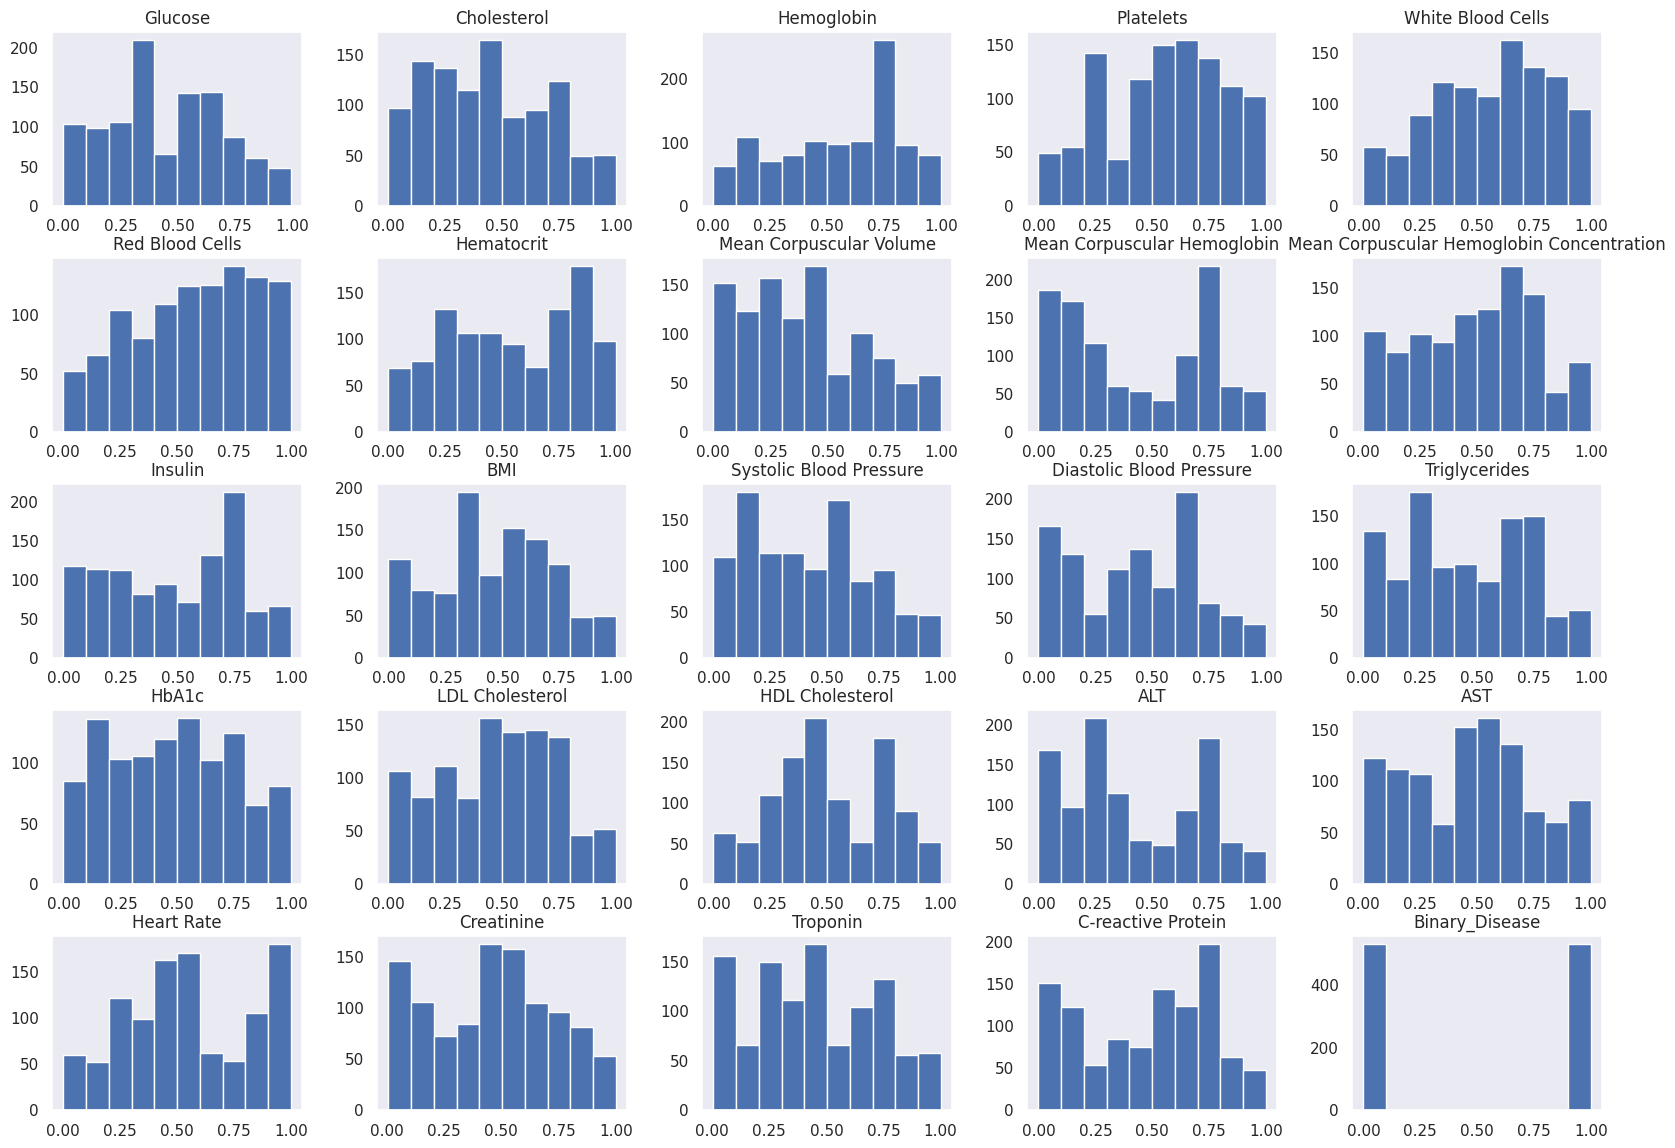

In [ ]:
# Data Visualization using histograms
df_balanced.hist(bins=10, grid=False, figsize=(20, 14))
plt.show()

In [ ]:
my_report = sv.analyze(df_balanced)
my_report.show_html('diagnosis_report_sweetviz.html')

                                             |          | [  0%]   00:00 -> (? left)

Report diagnosis_report_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



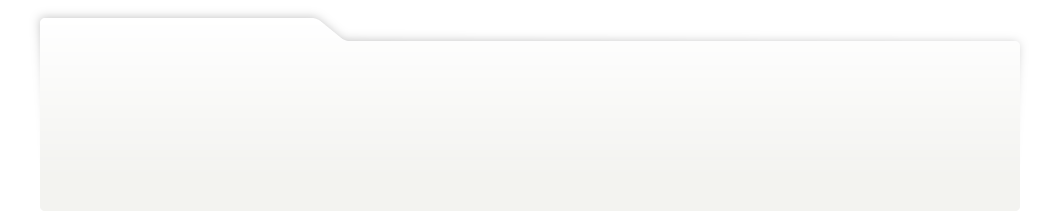
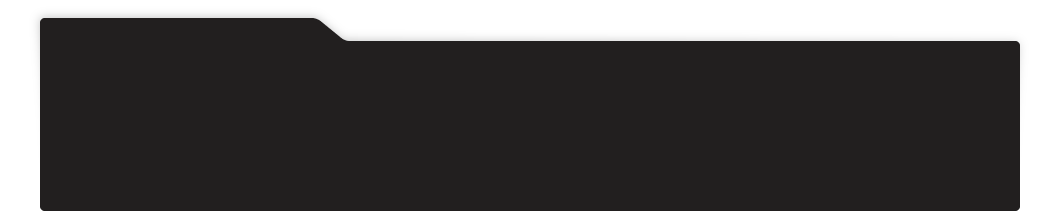
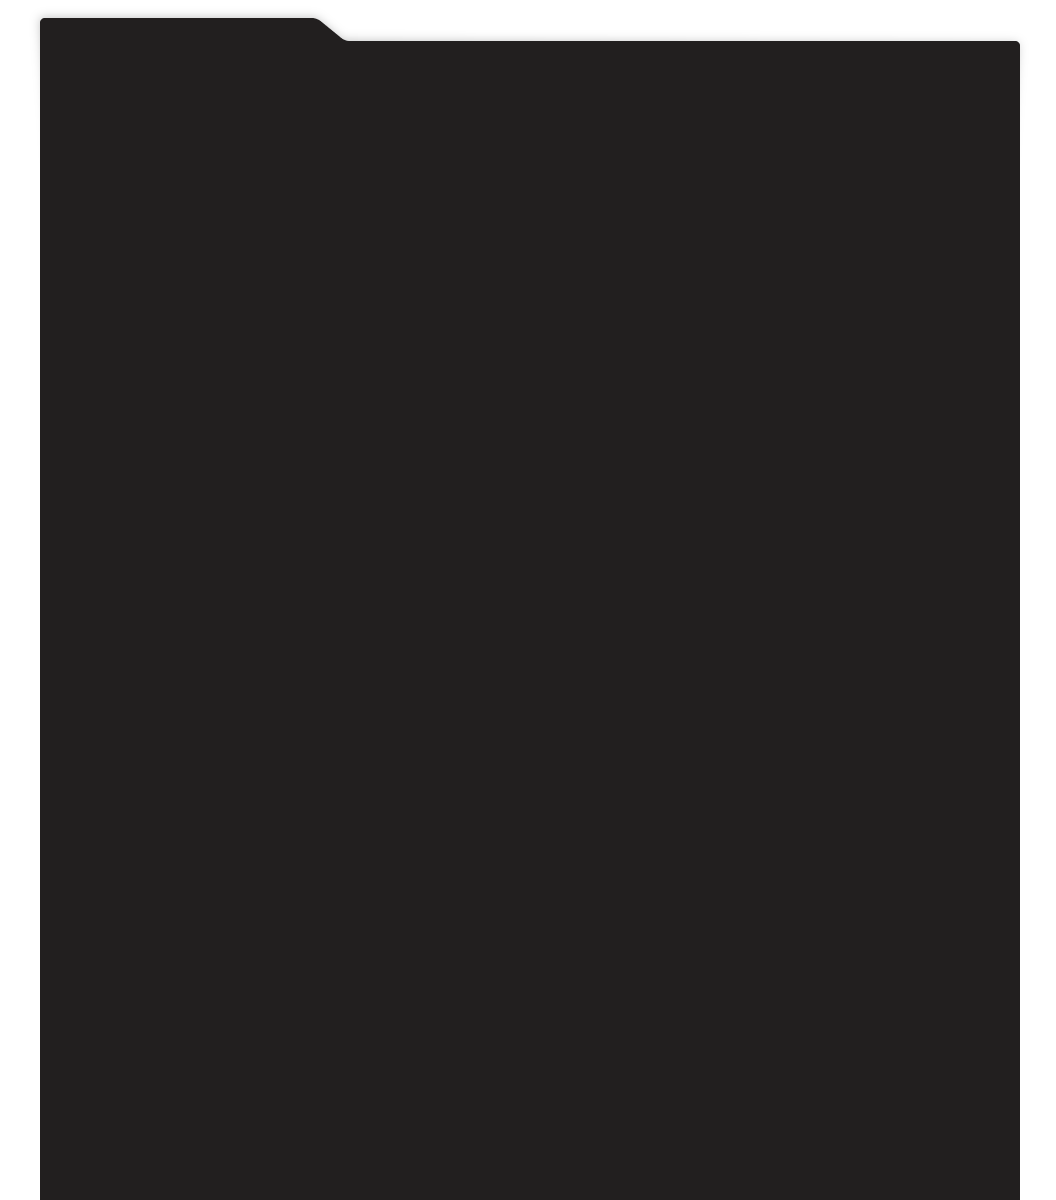
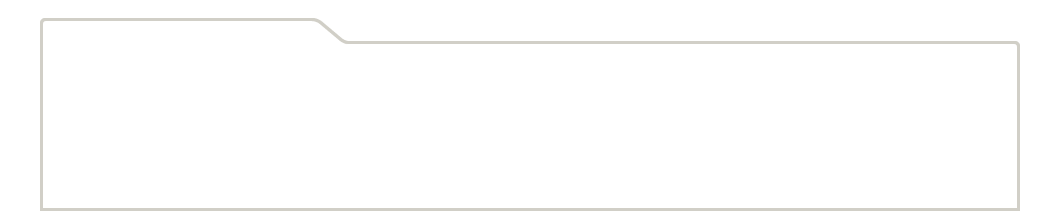
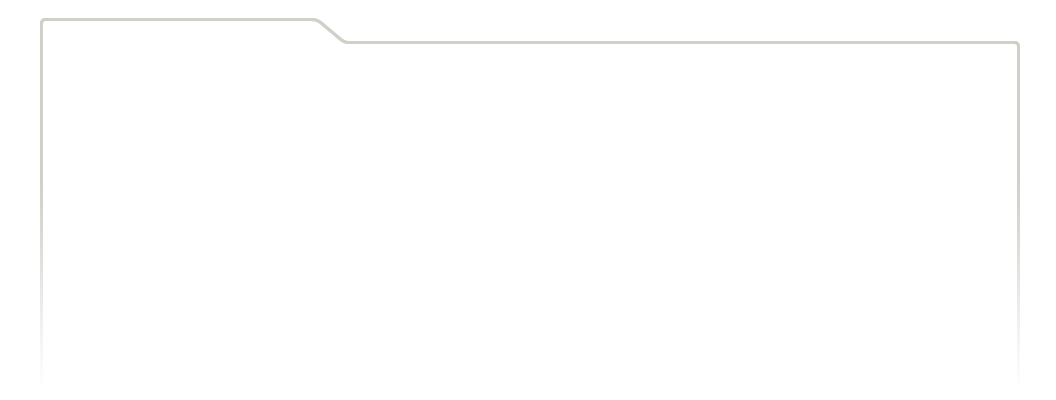
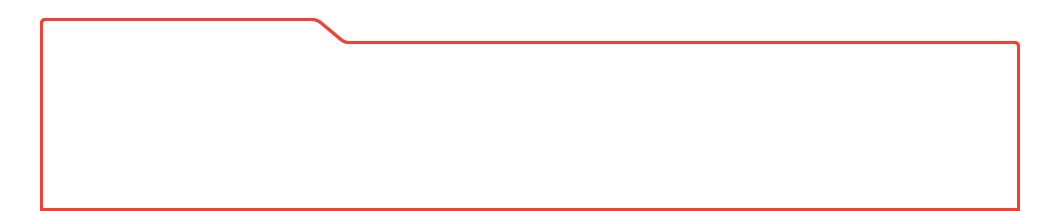
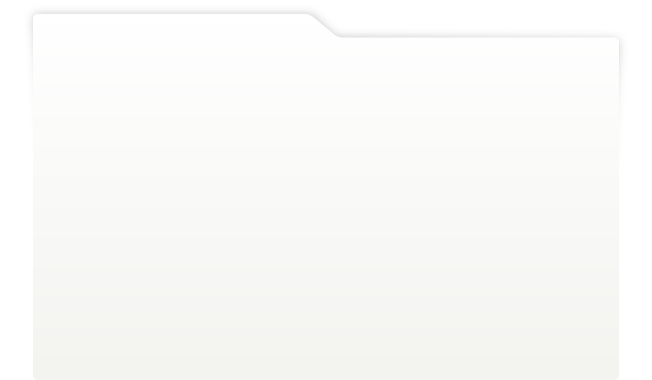
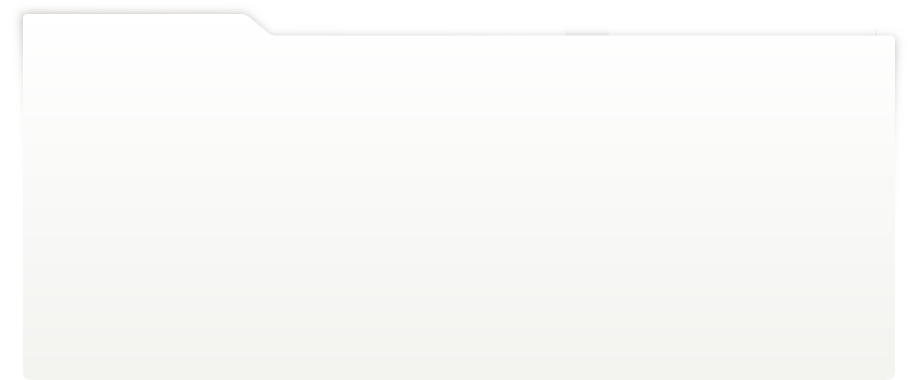
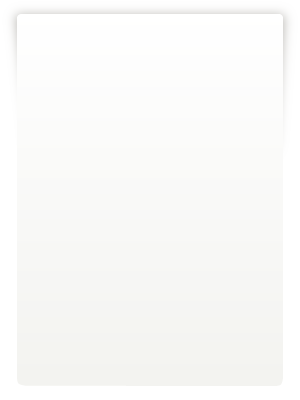
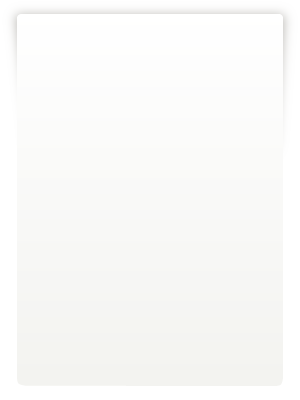
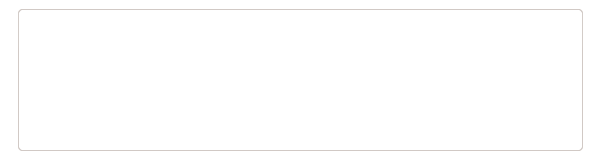
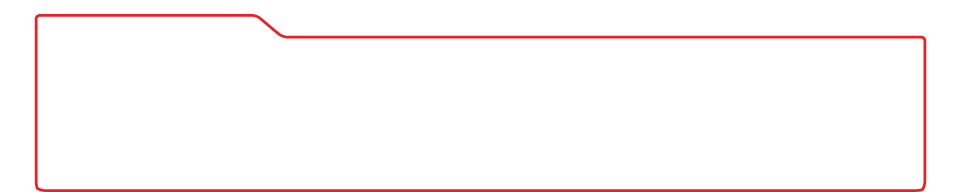
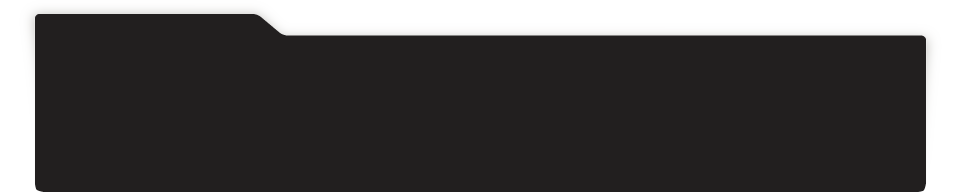
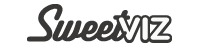
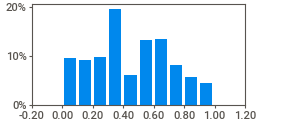
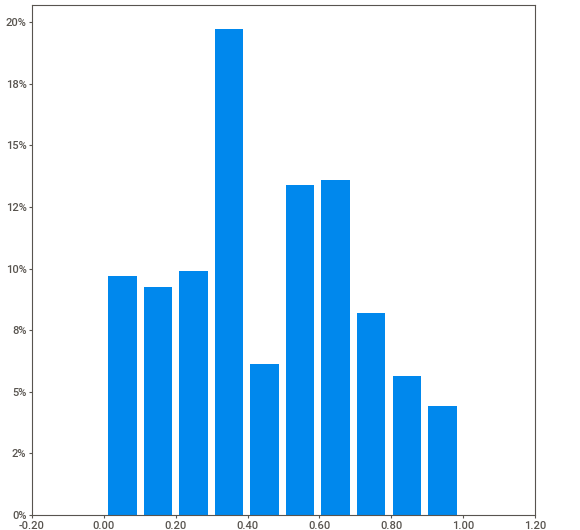
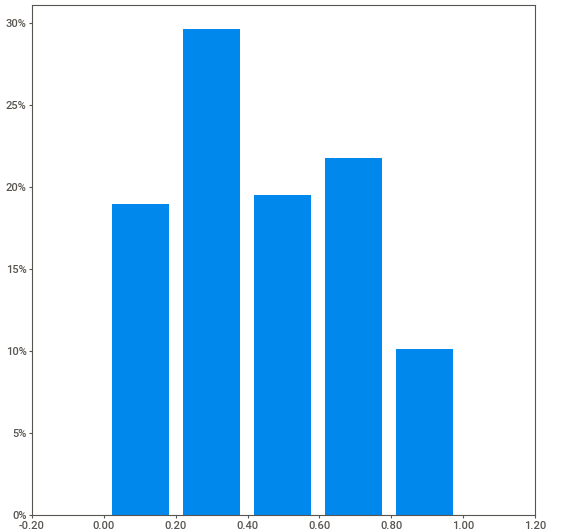
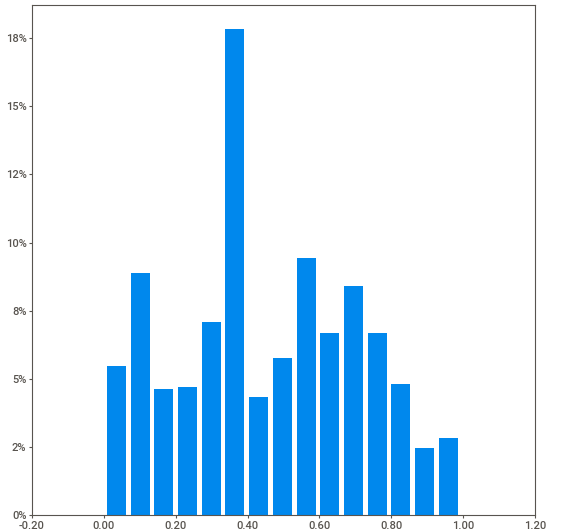
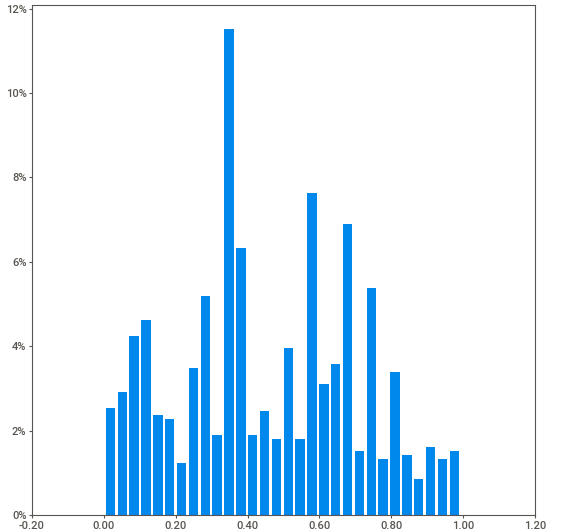
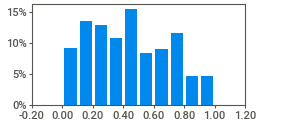
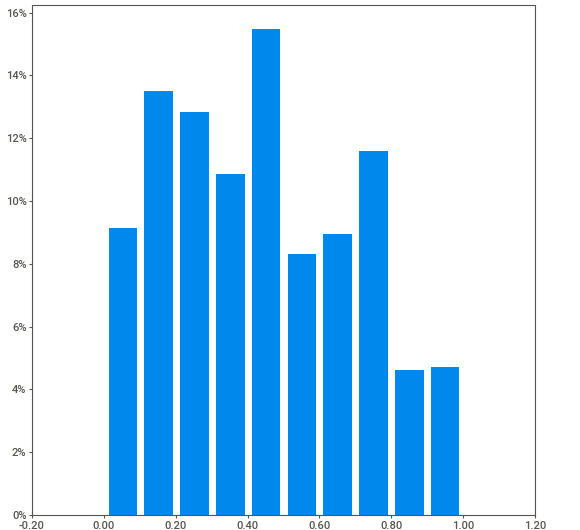
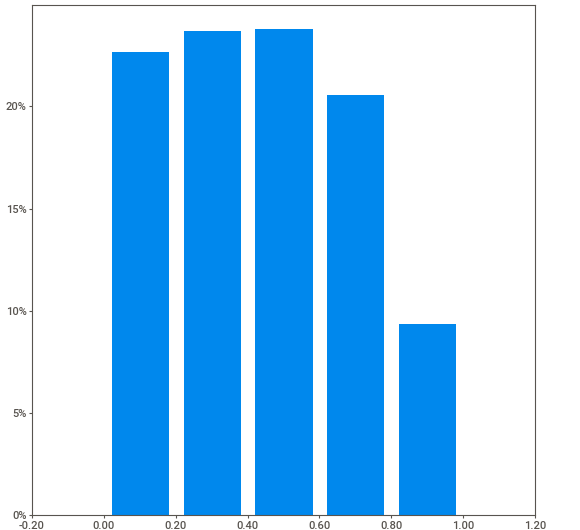
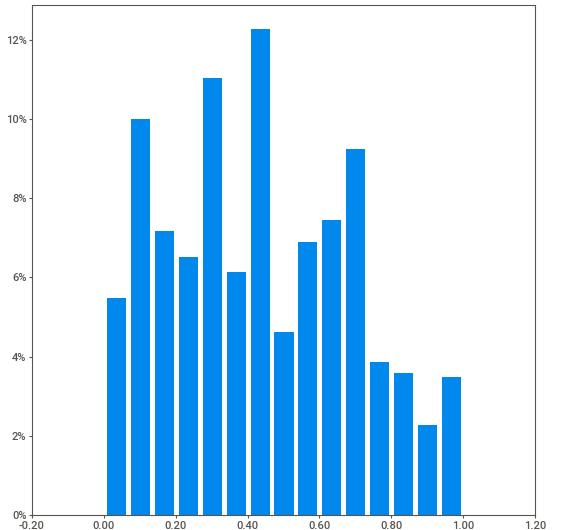
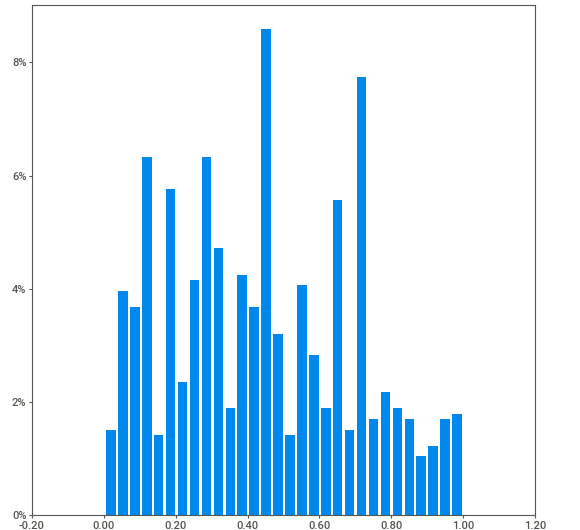
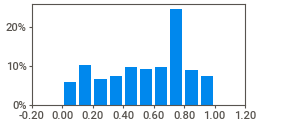
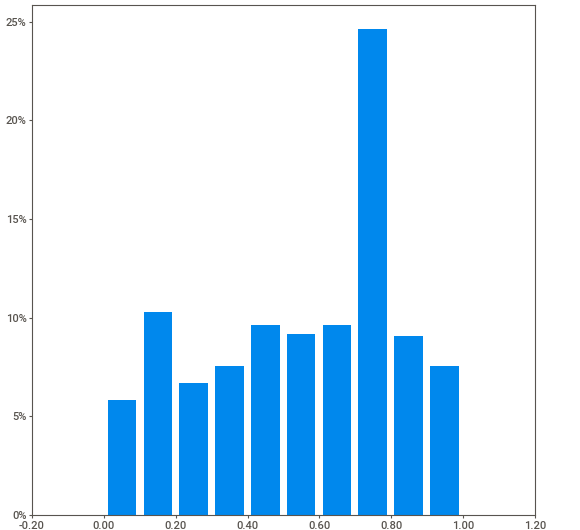
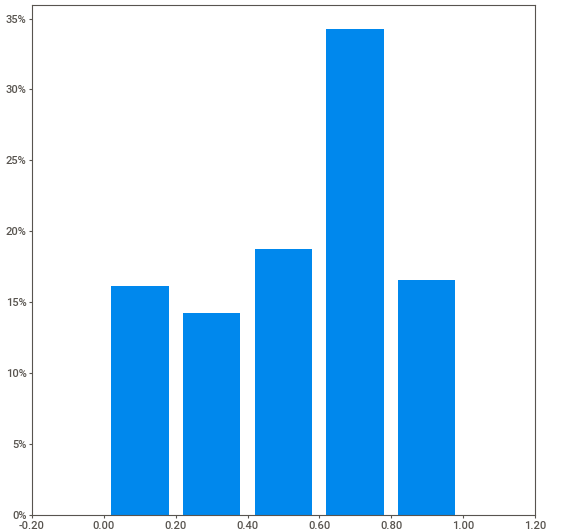
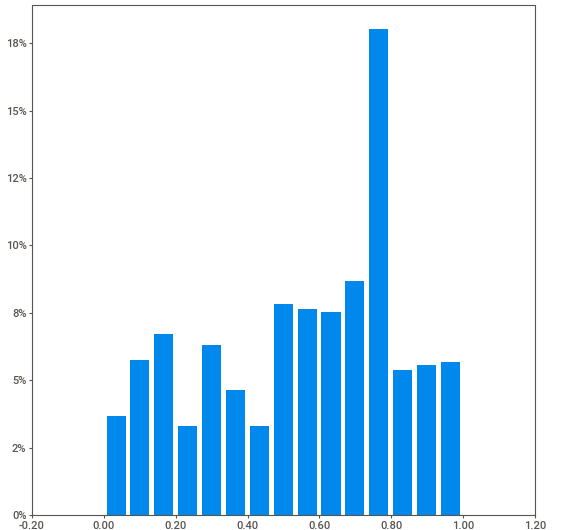
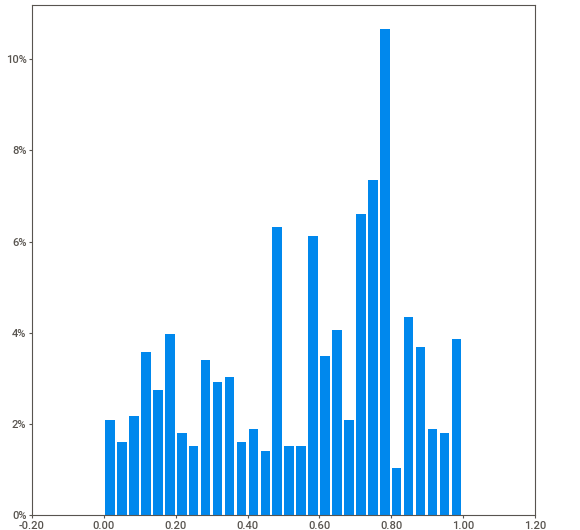
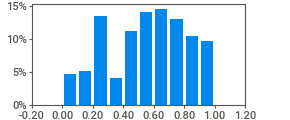
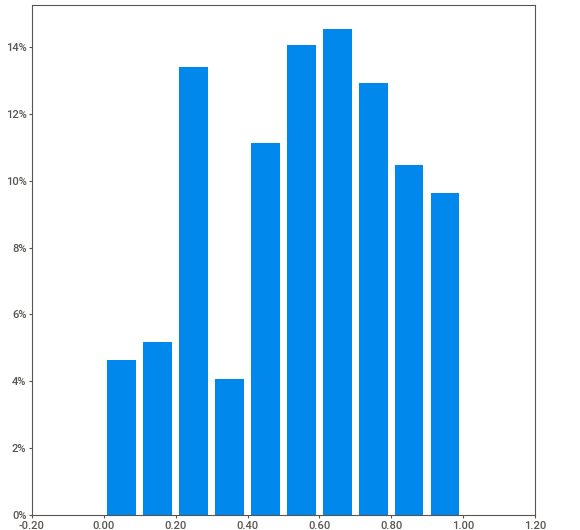
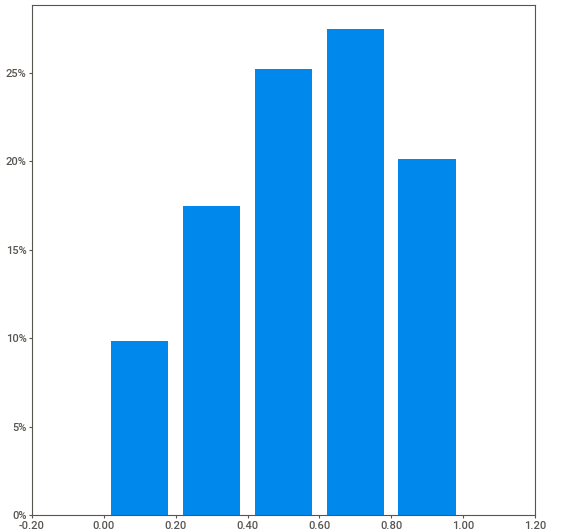
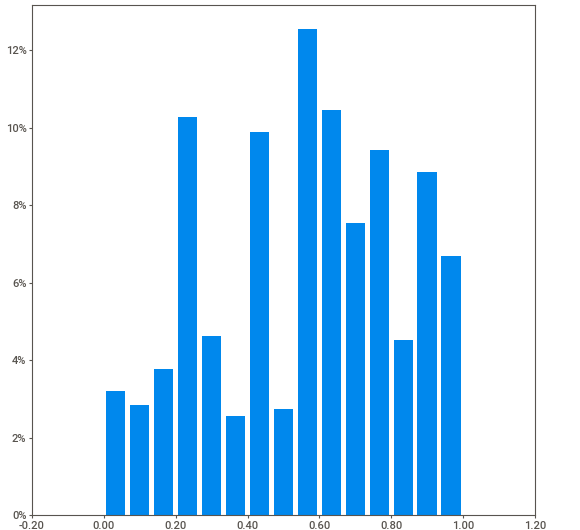
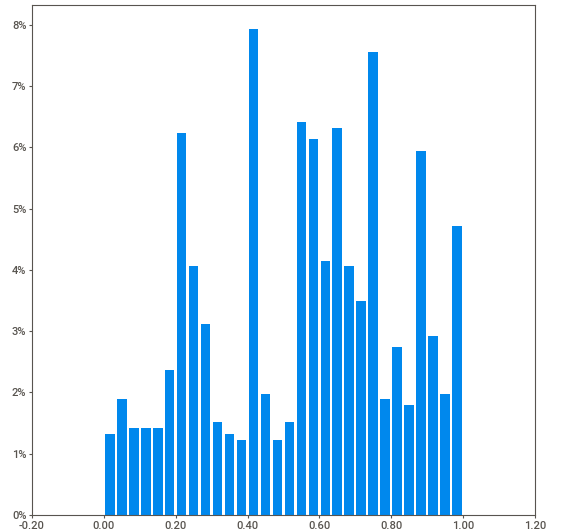
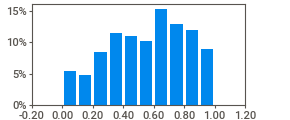
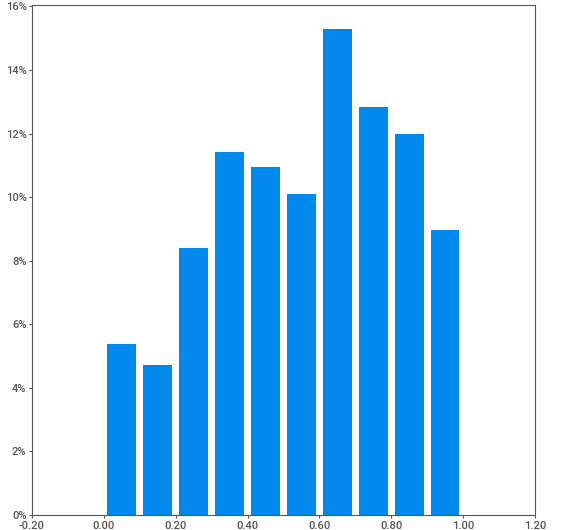
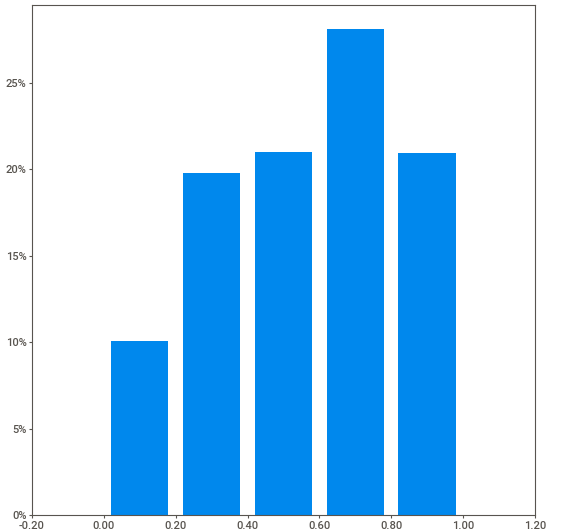
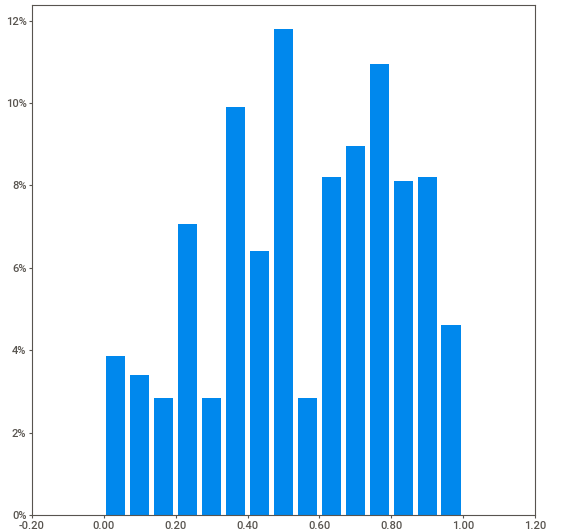
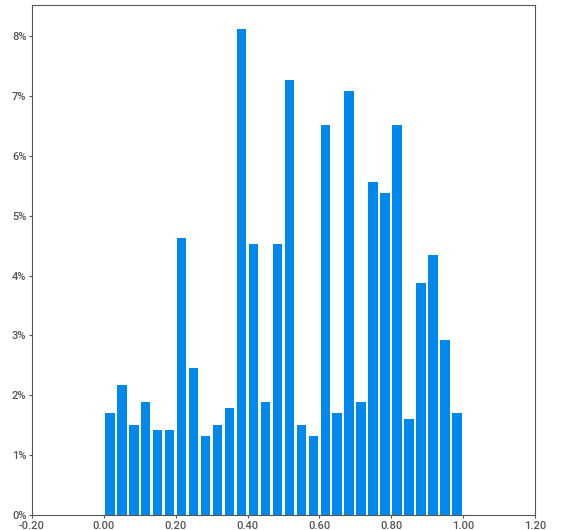
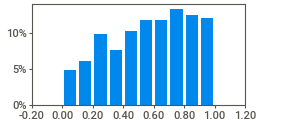
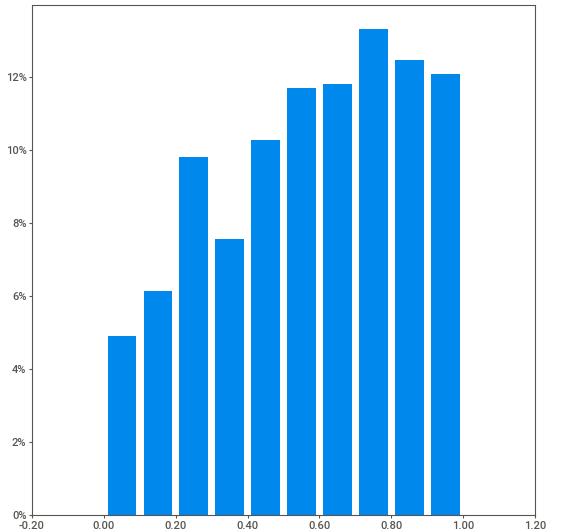
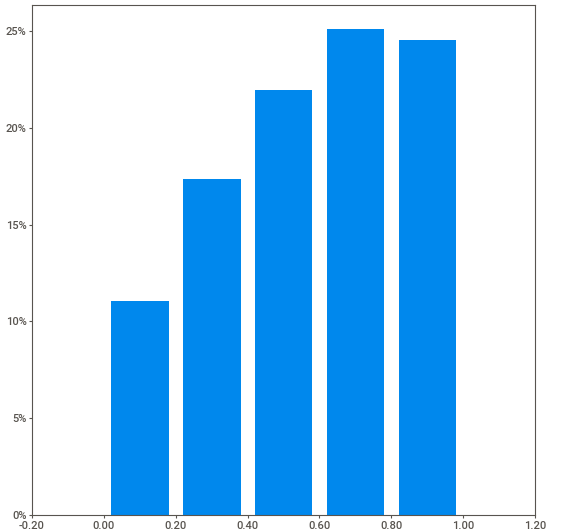
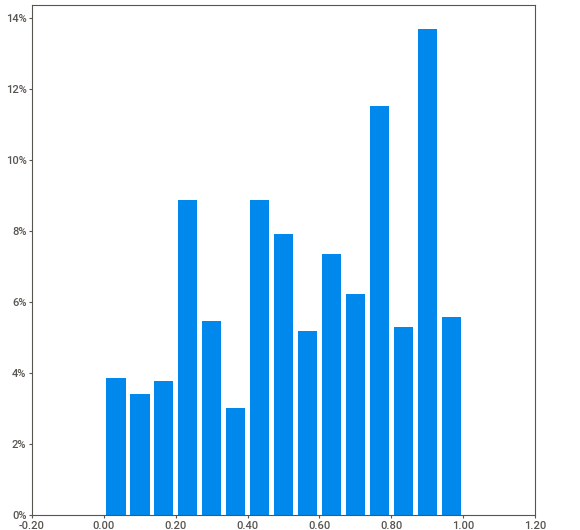
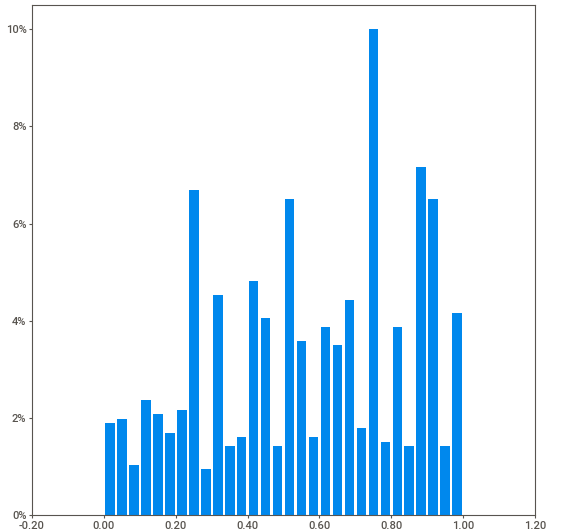
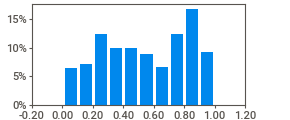
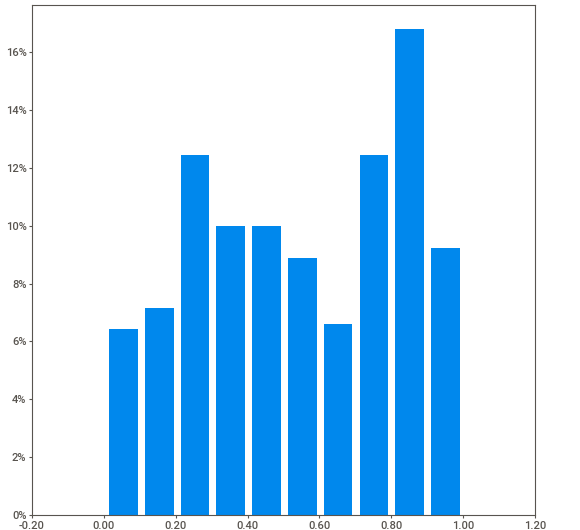
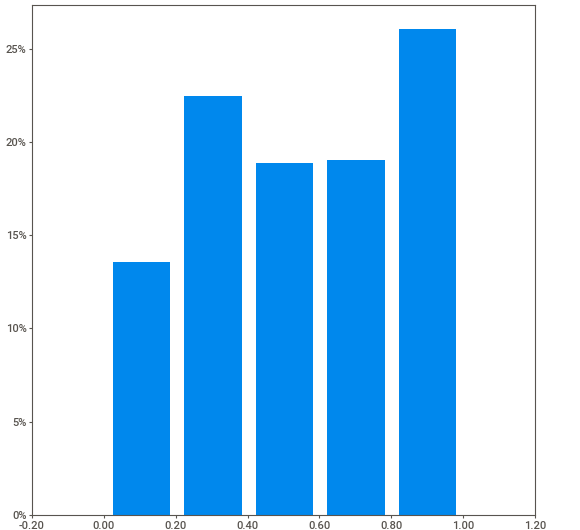
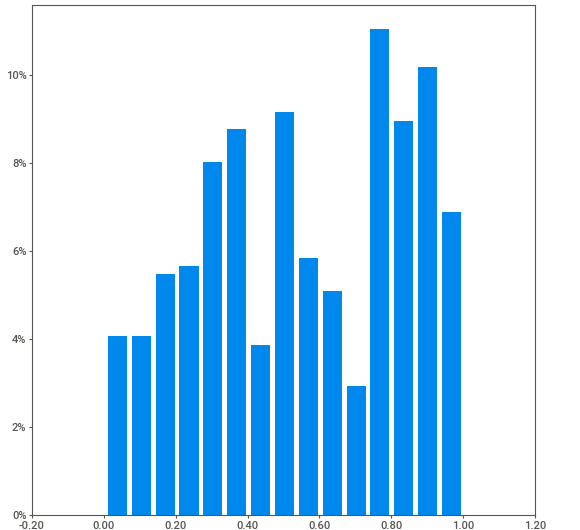
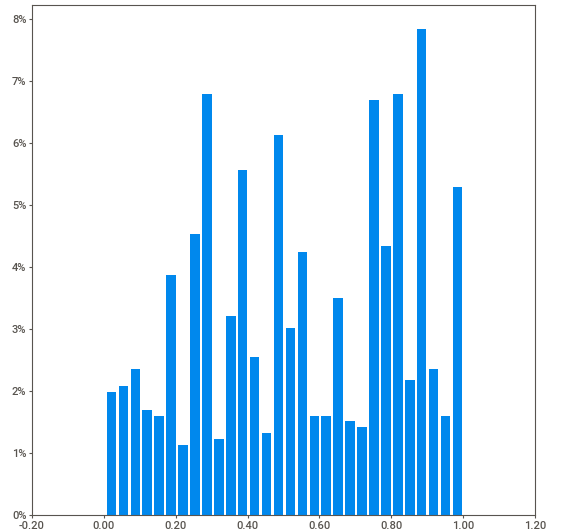
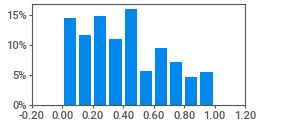
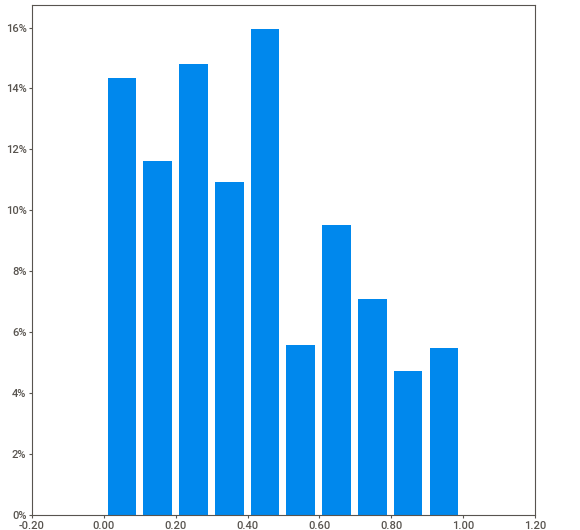
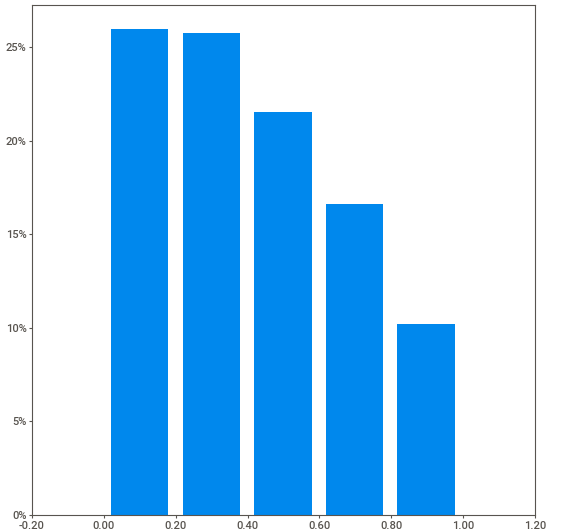
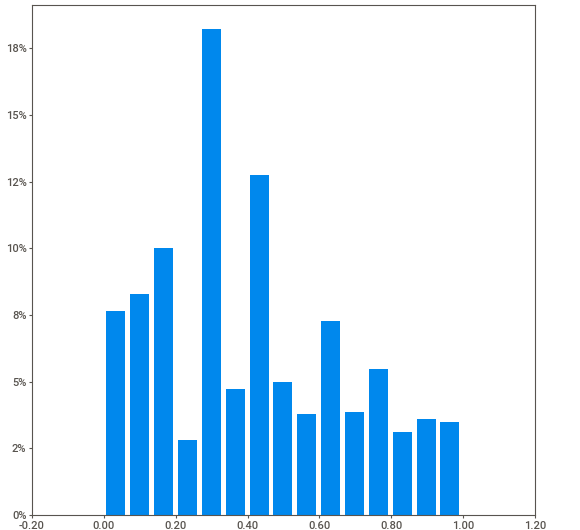
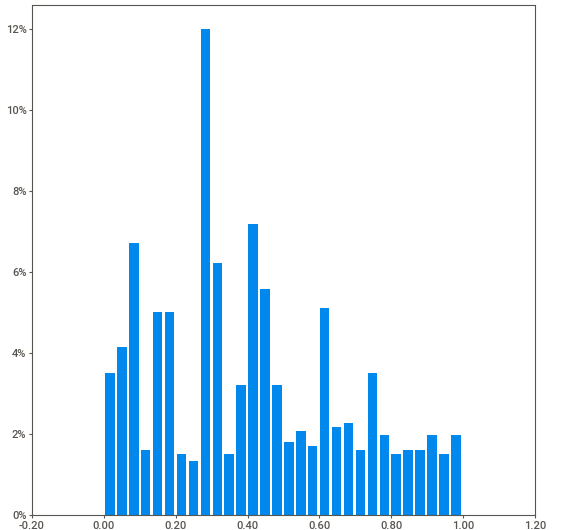
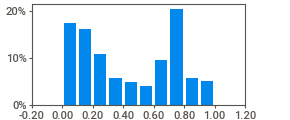
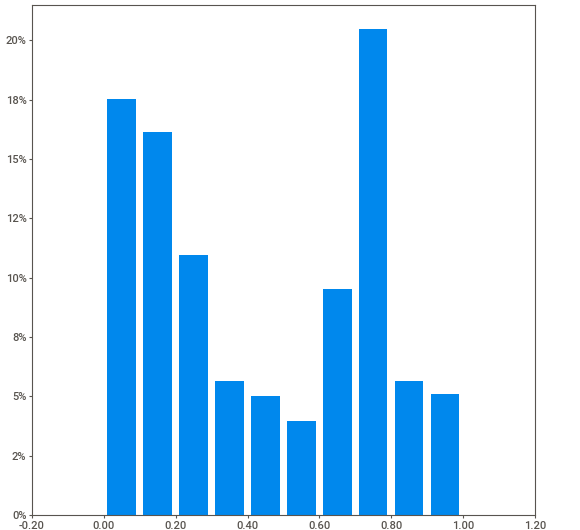
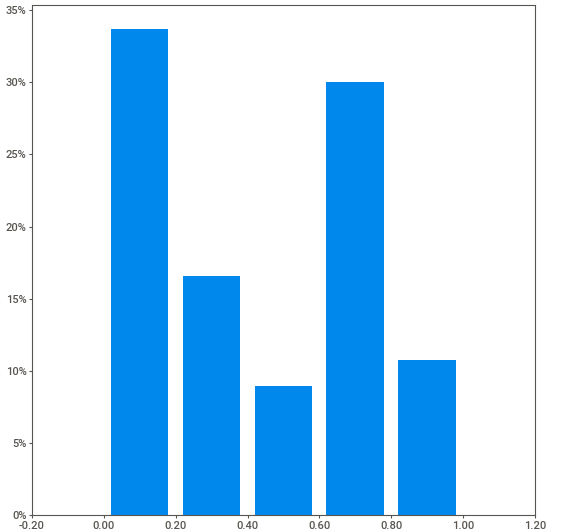
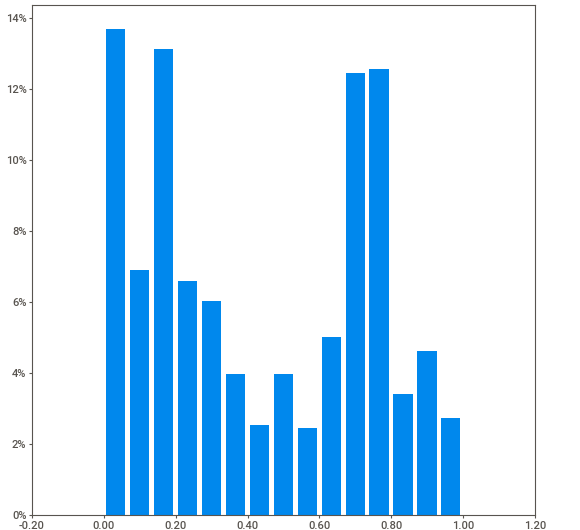
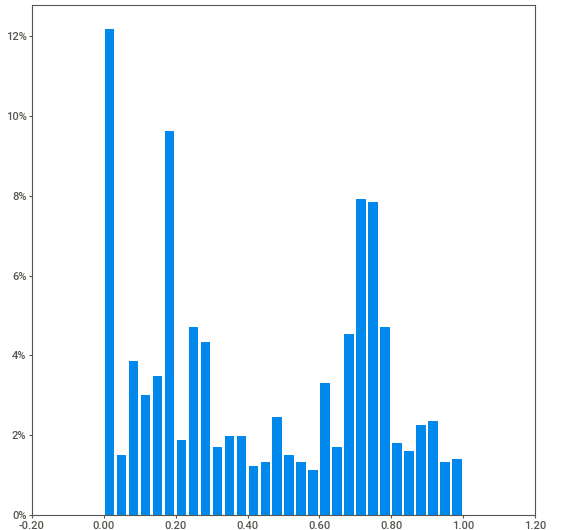
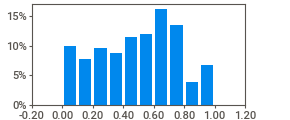
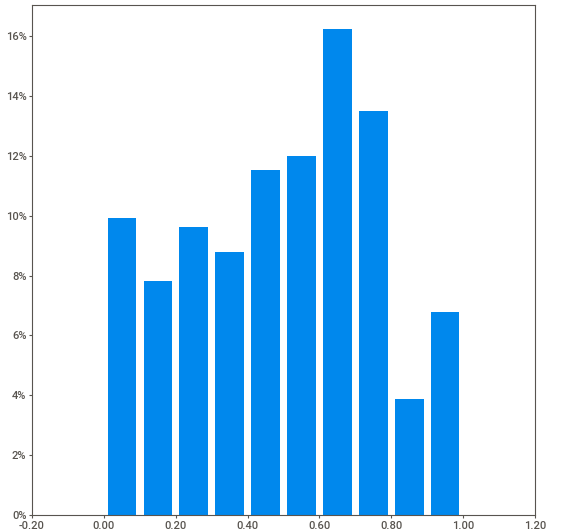
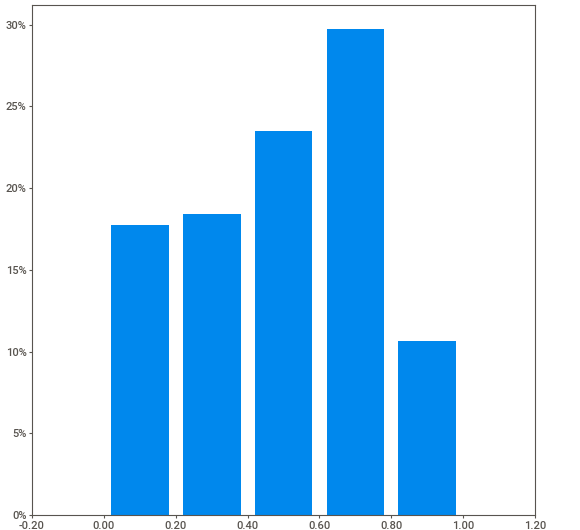
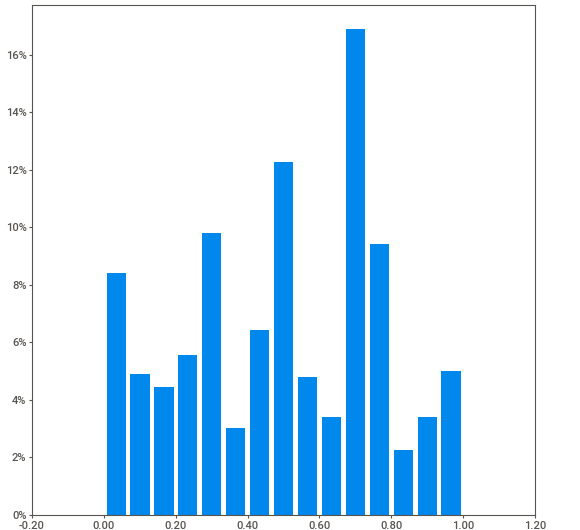
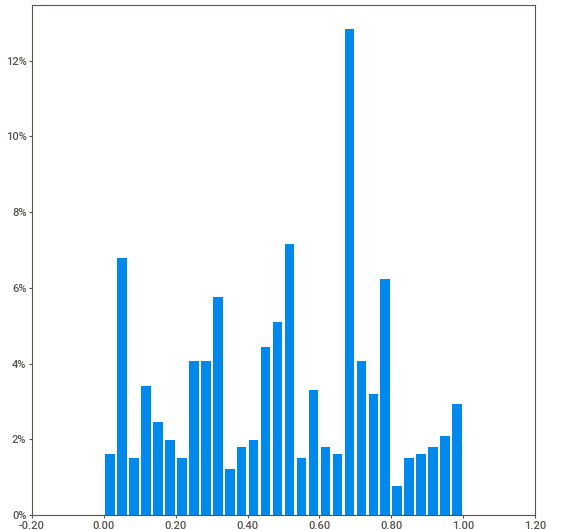
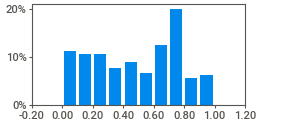
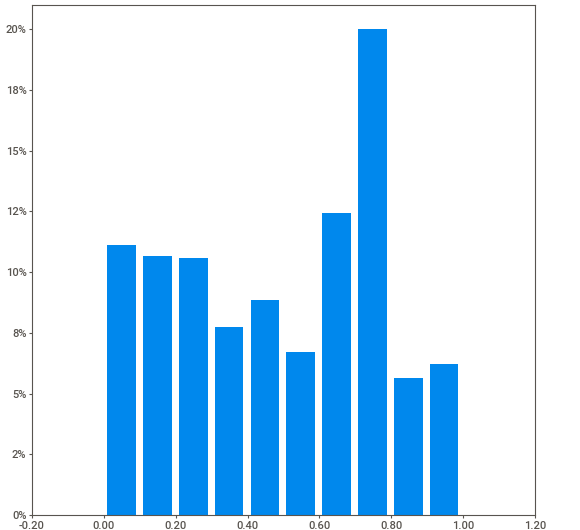
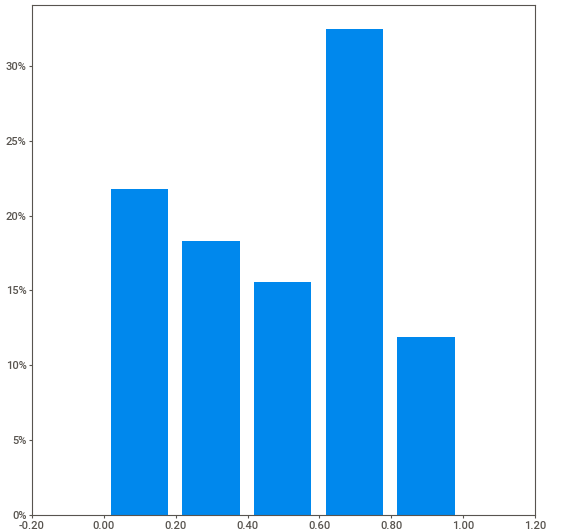
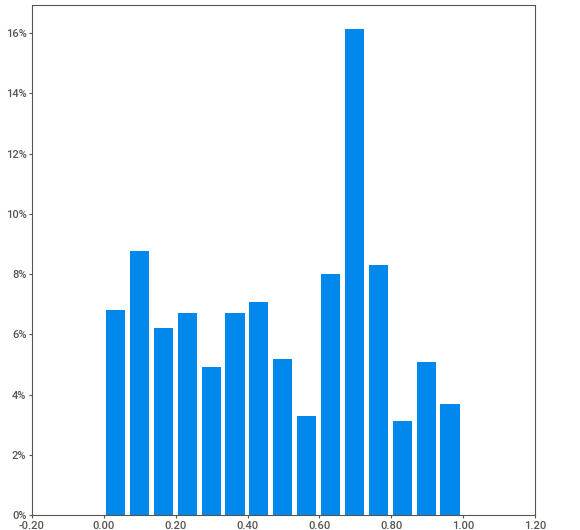
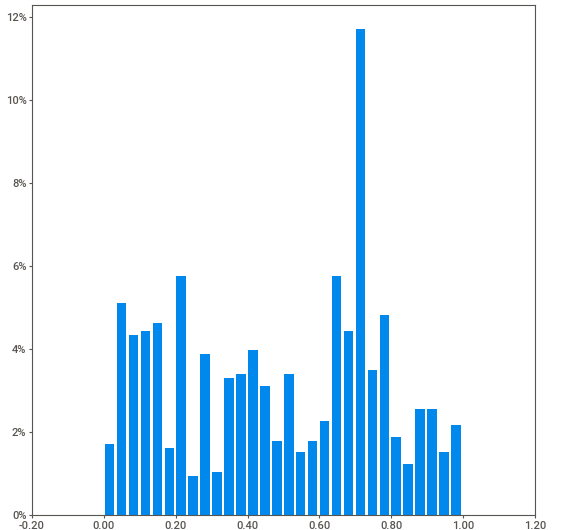
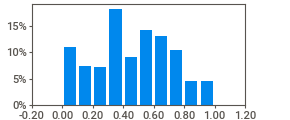
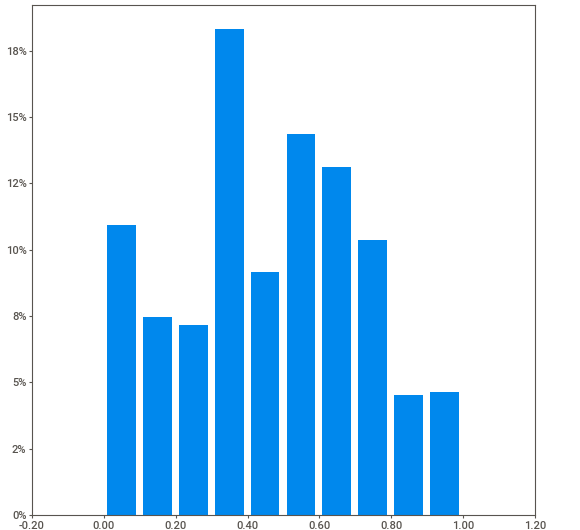
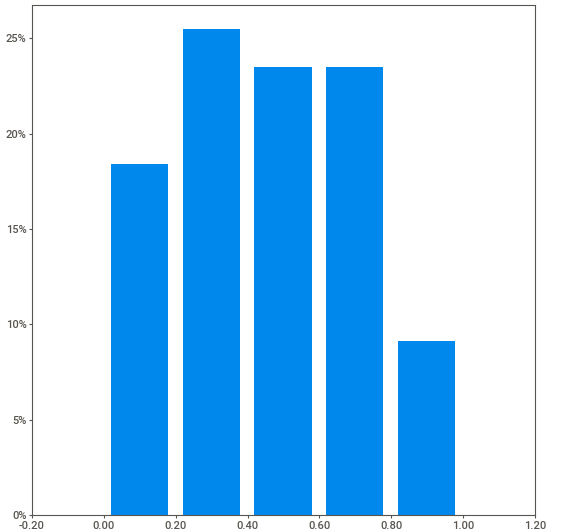
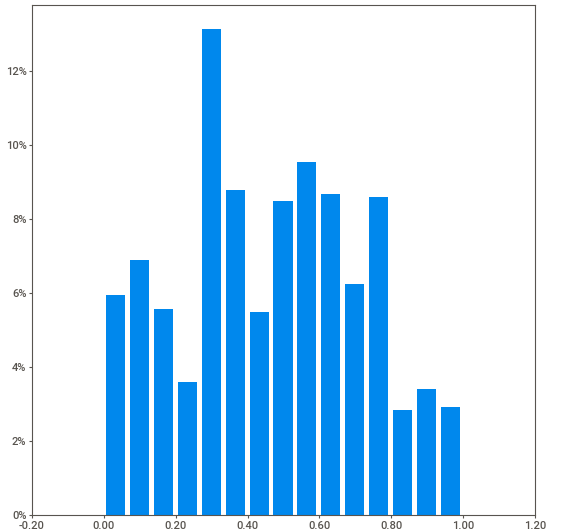
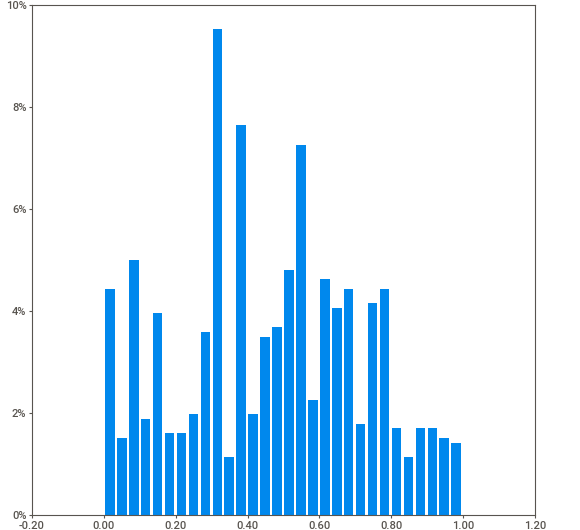
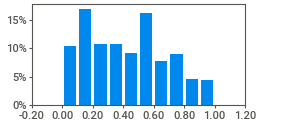
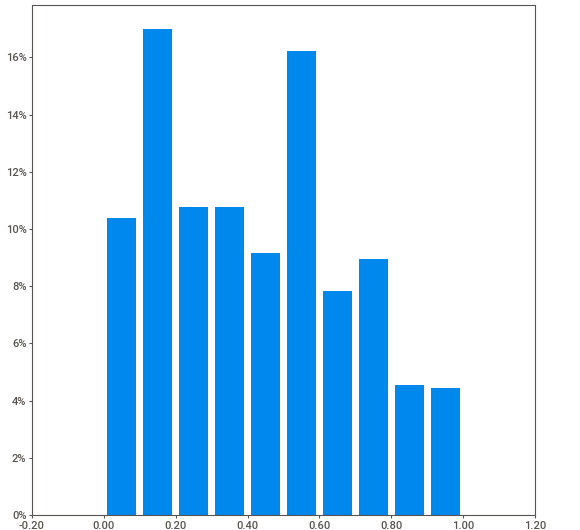
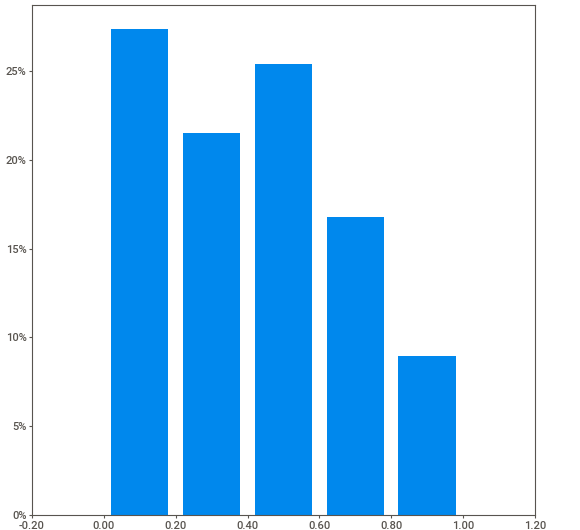
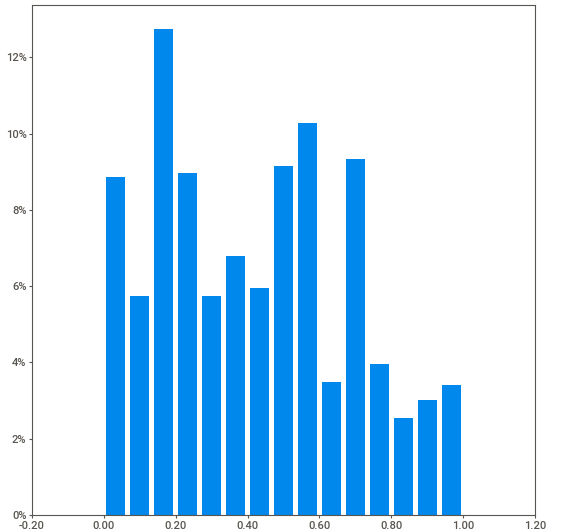
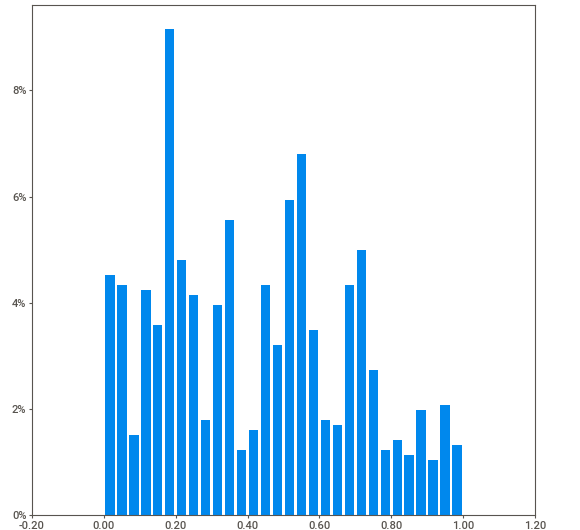
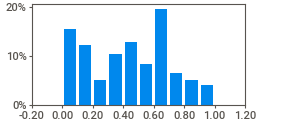
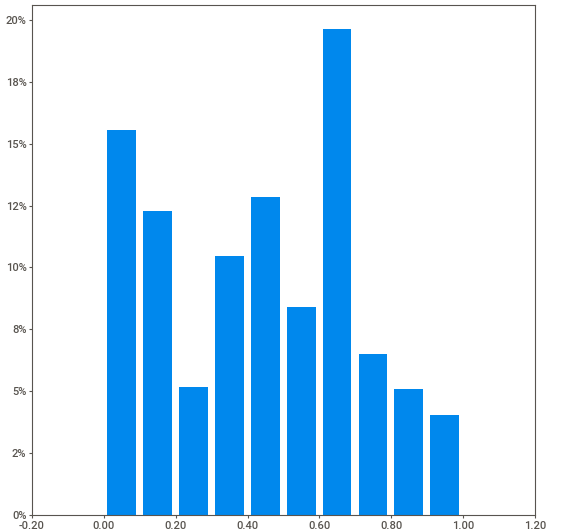
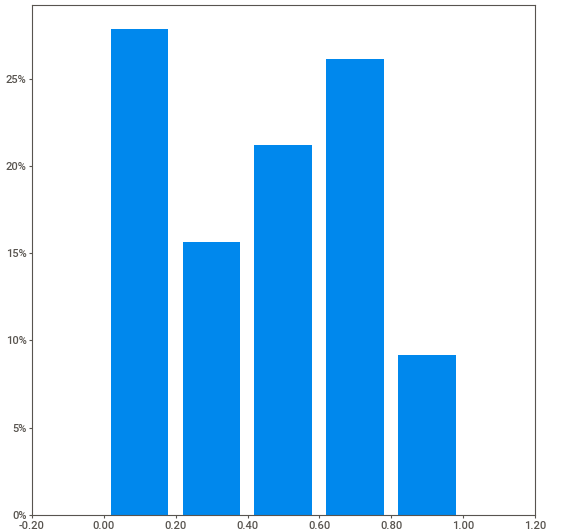
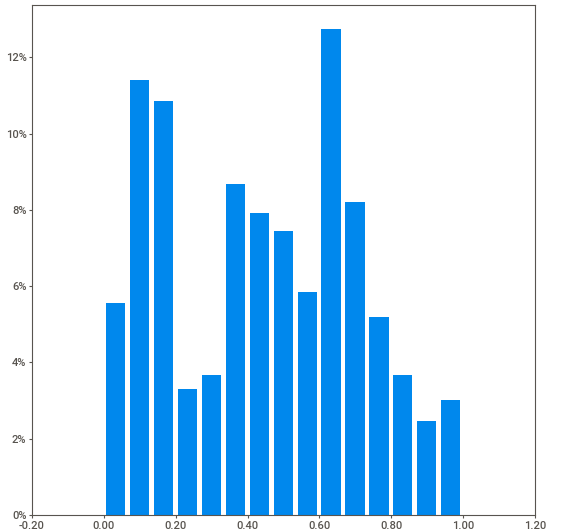
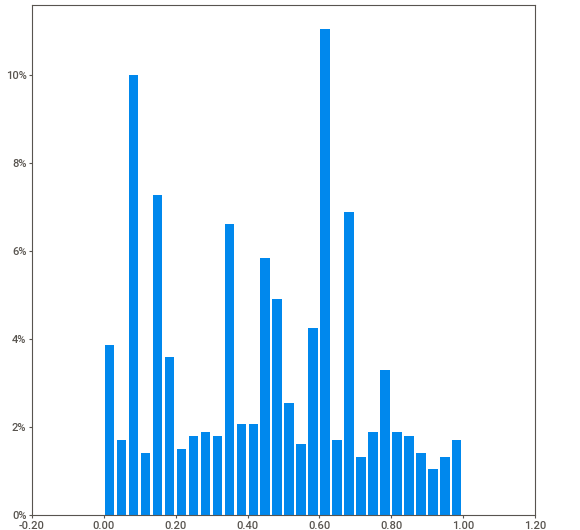
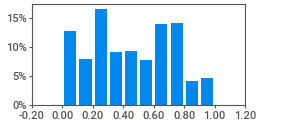
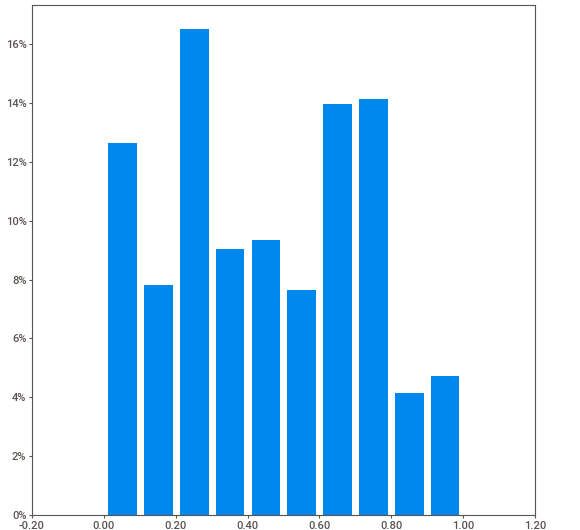
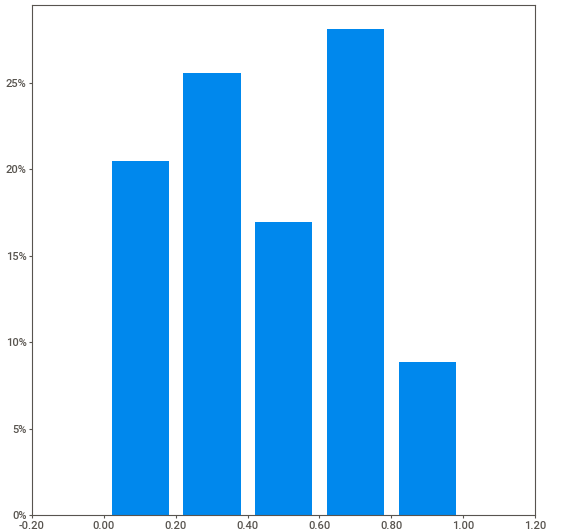
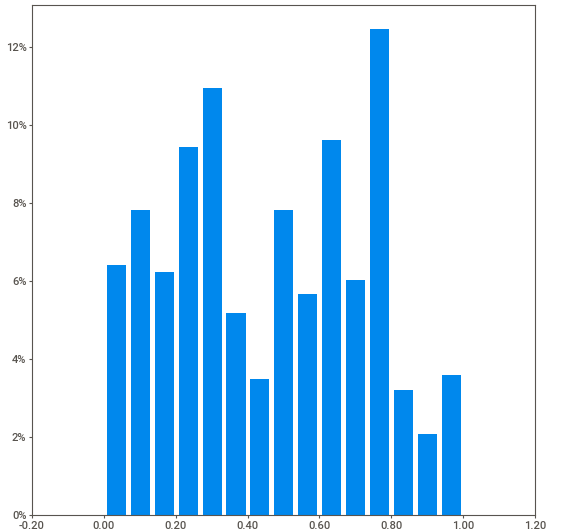
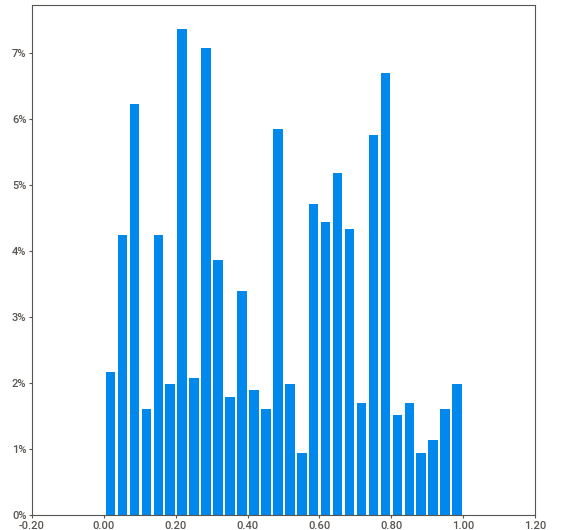
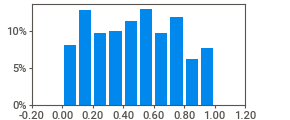
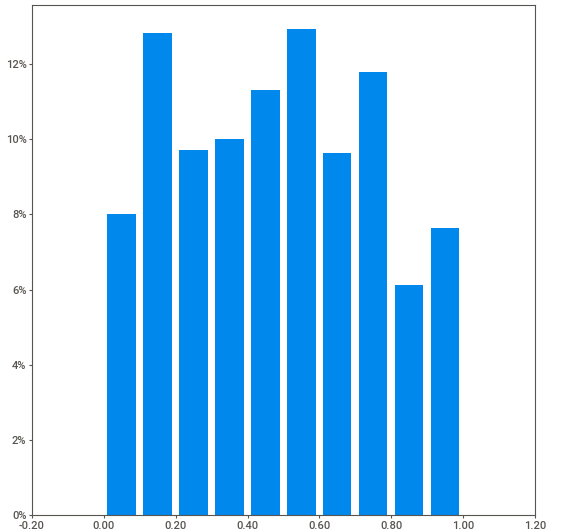
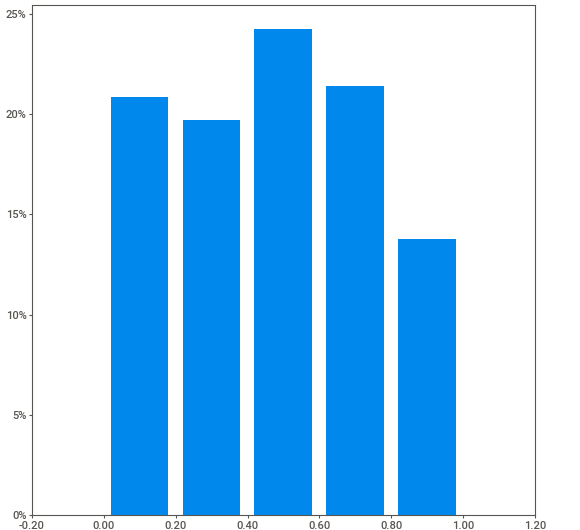
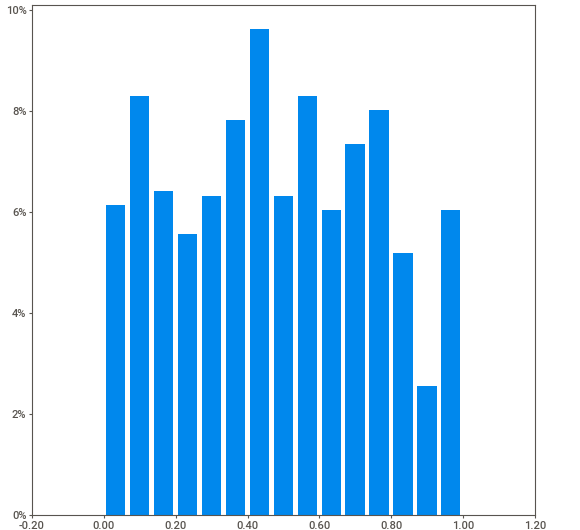
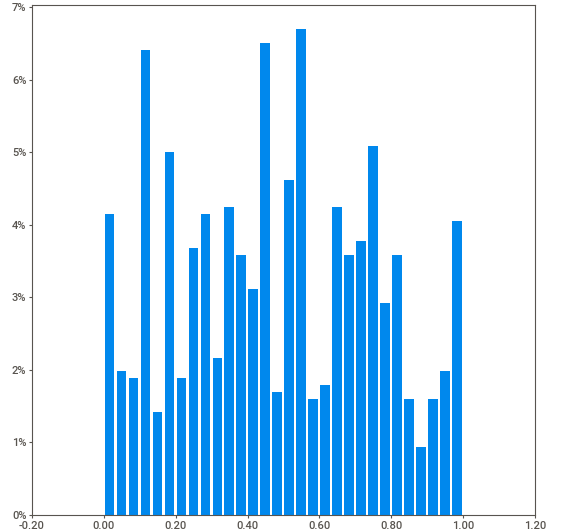
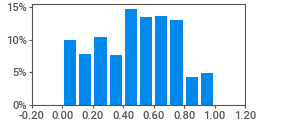
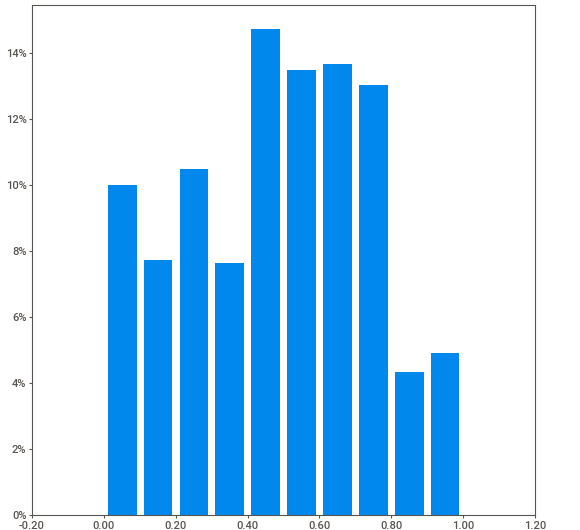
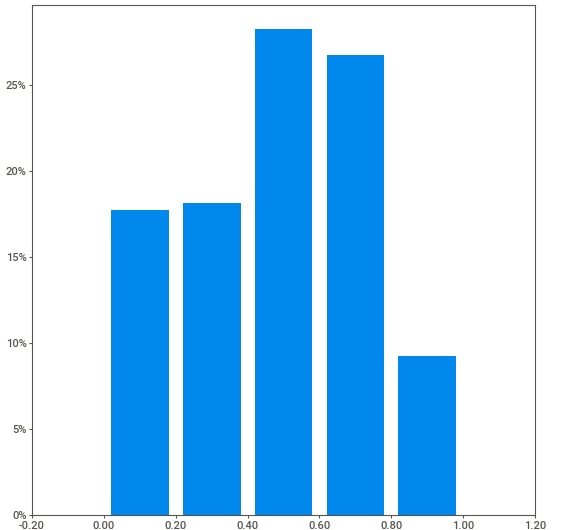
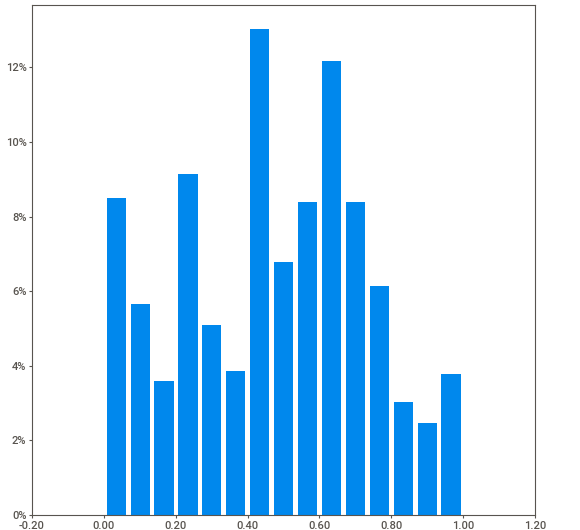
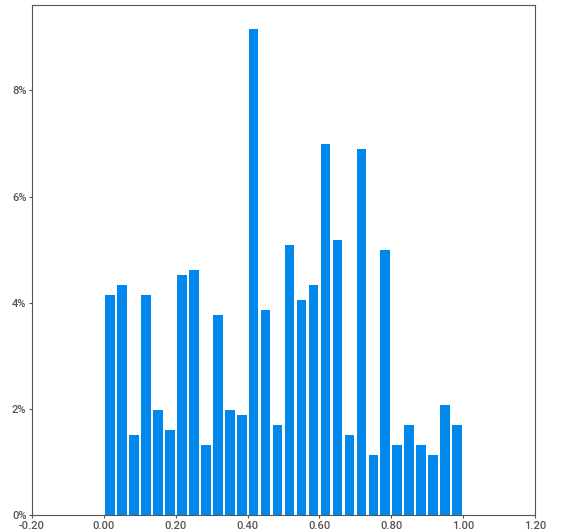
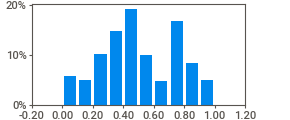
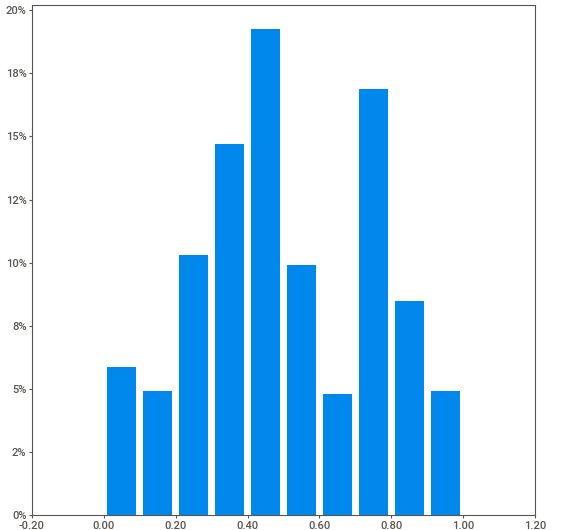
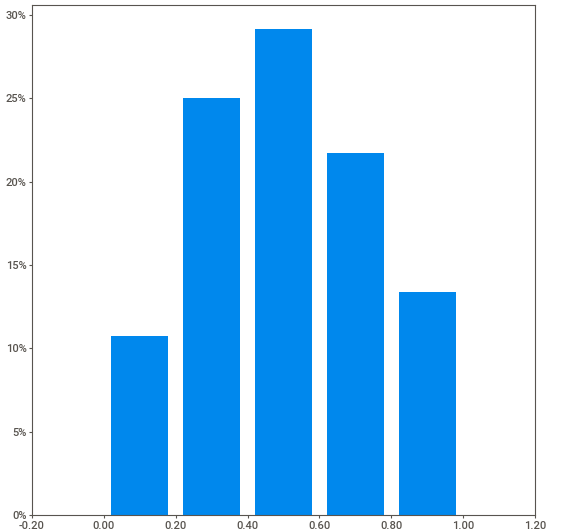
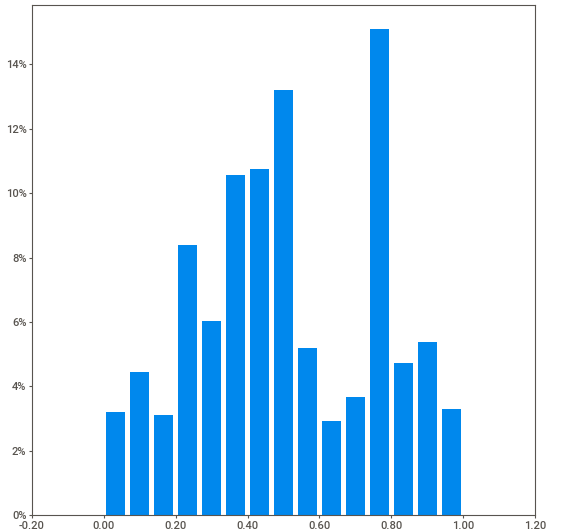
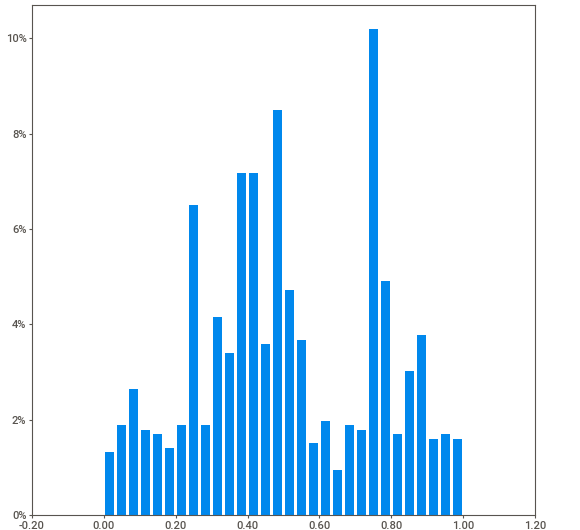
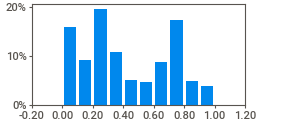
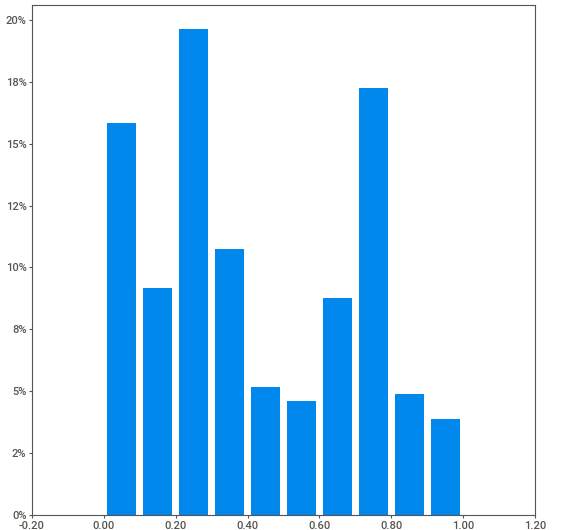
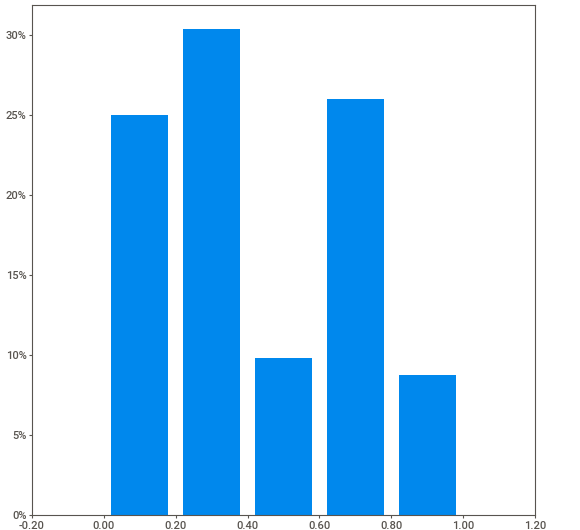
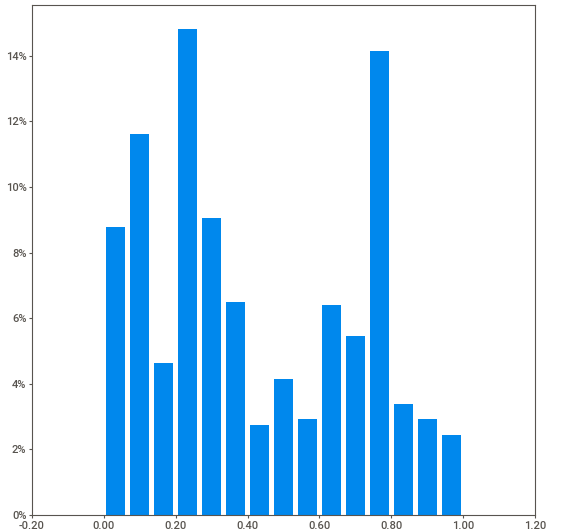
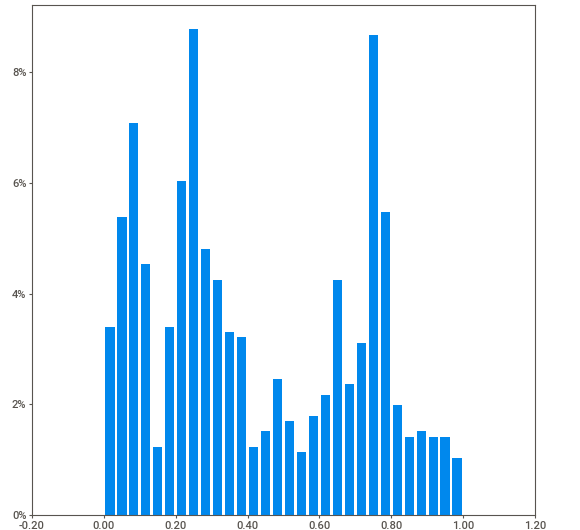
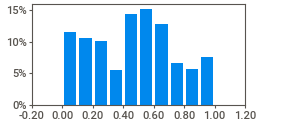
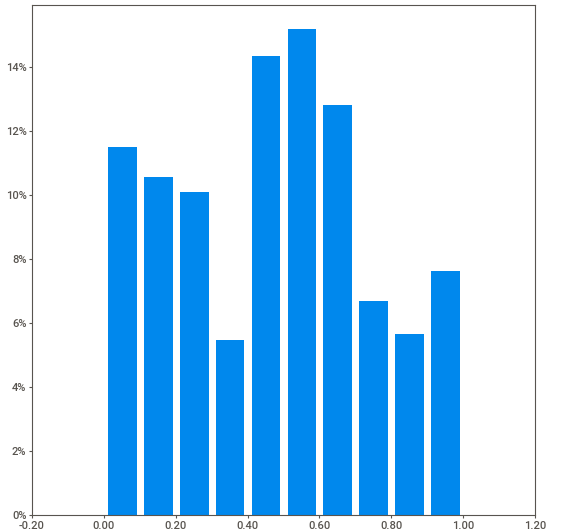
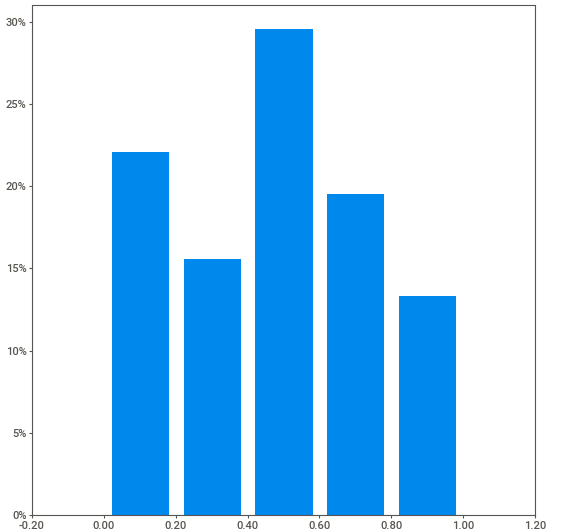
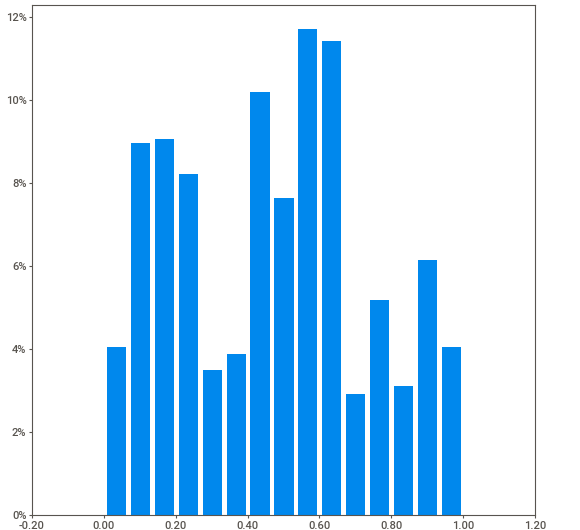
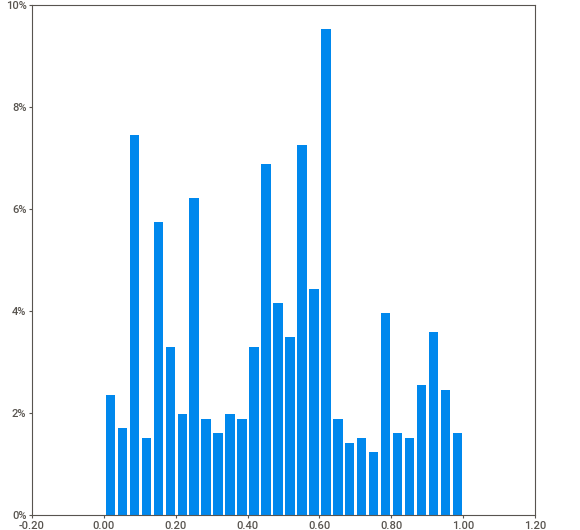
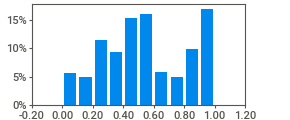
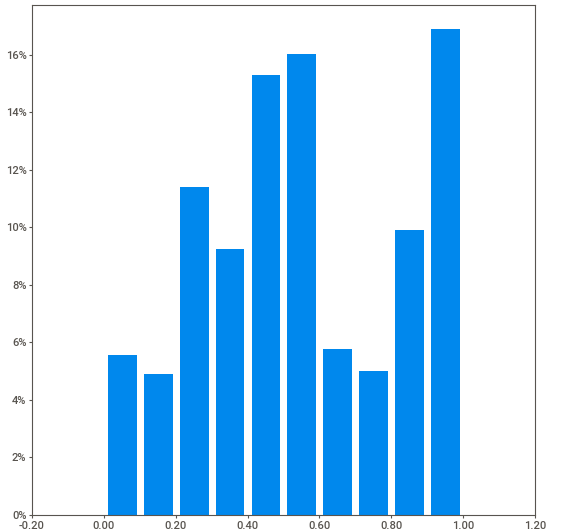
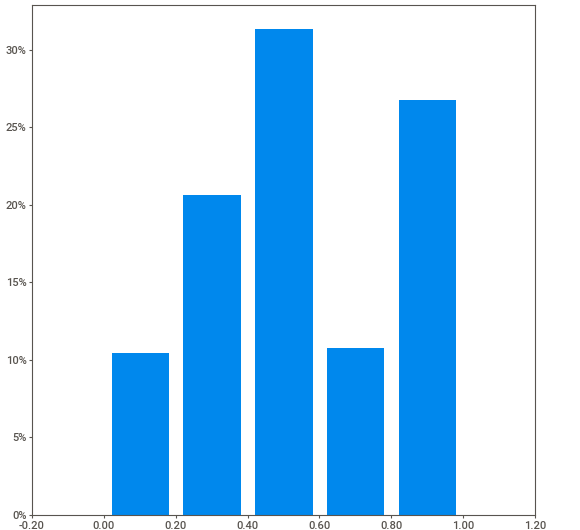
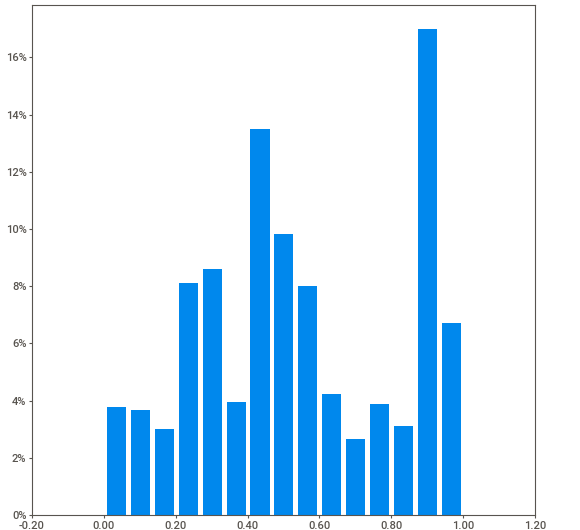
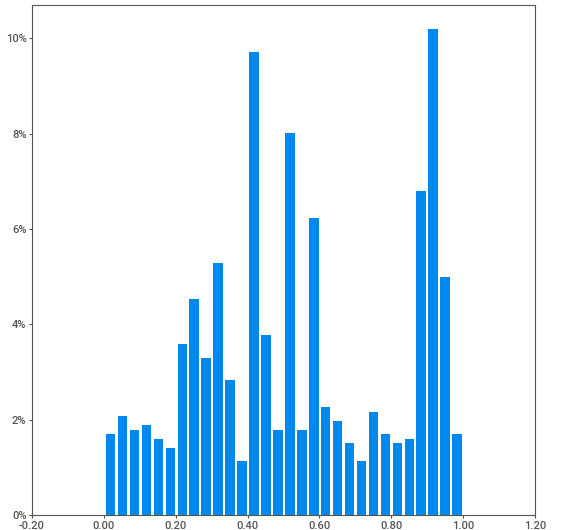
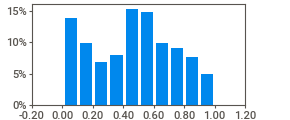
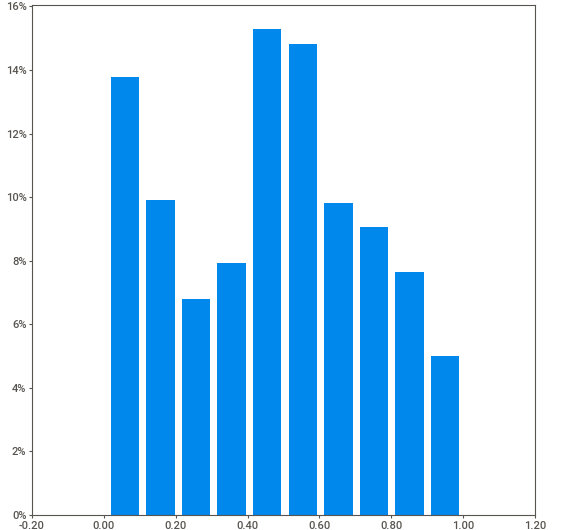
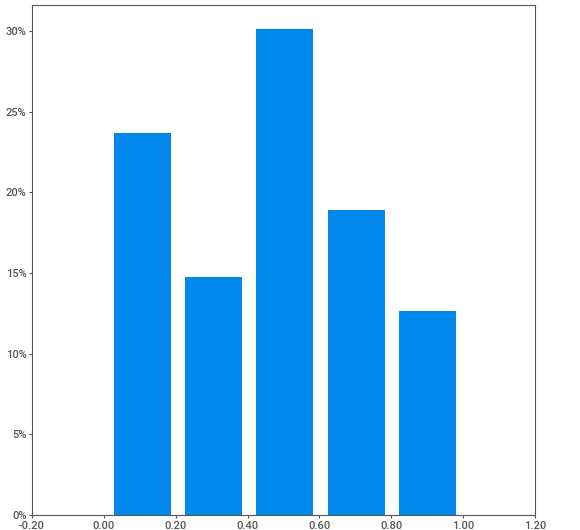
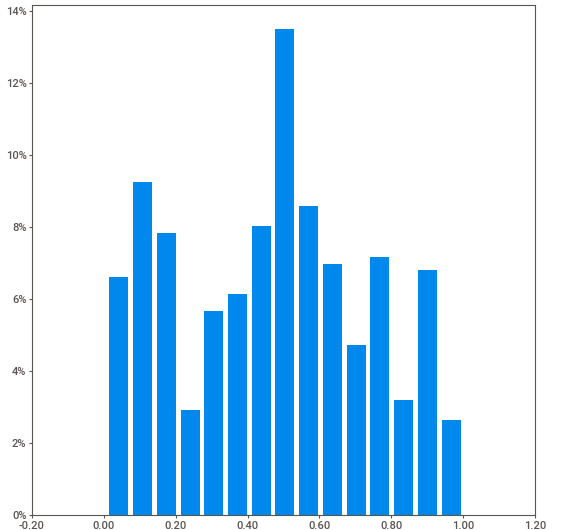
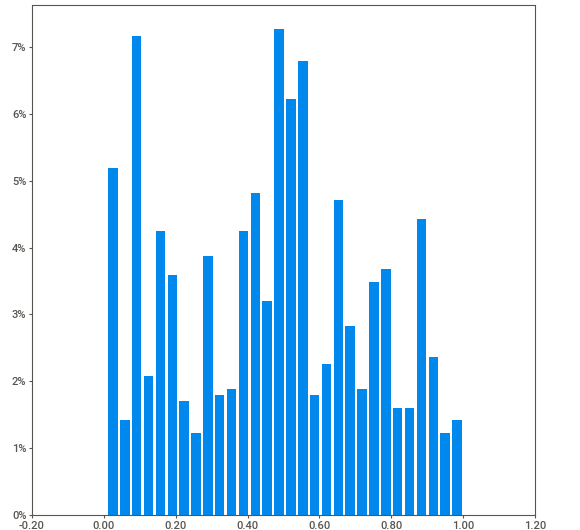
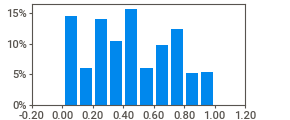
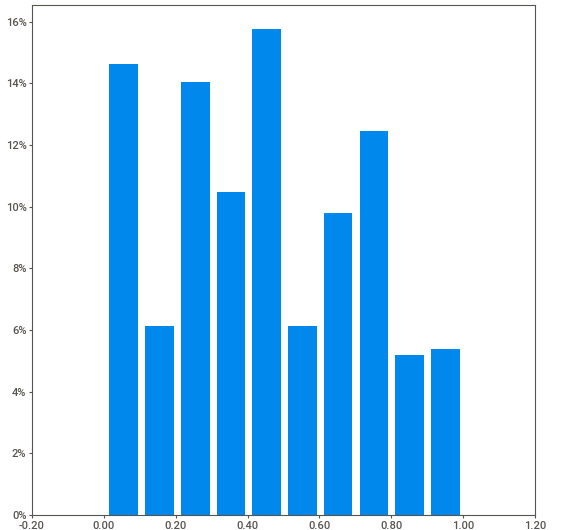
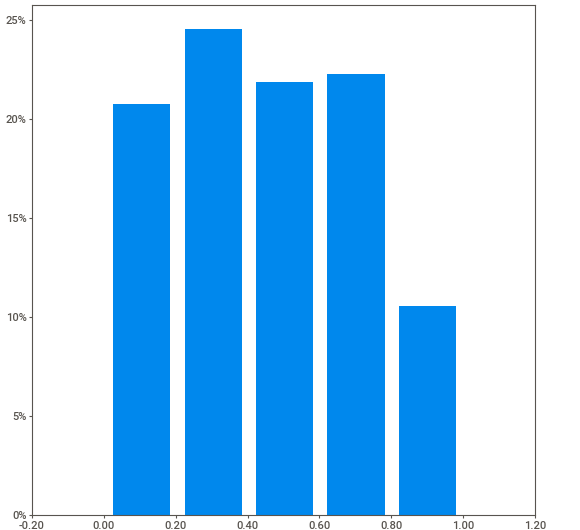
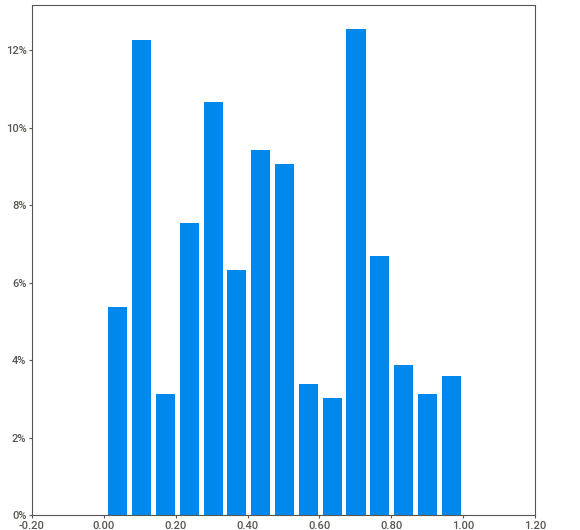
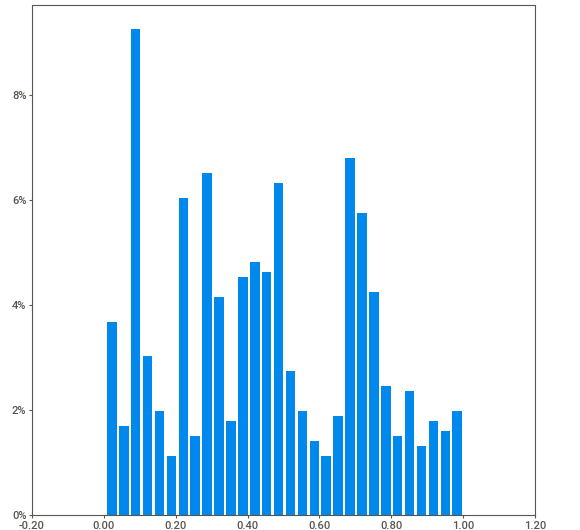
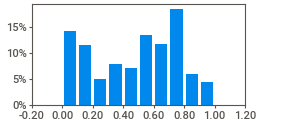
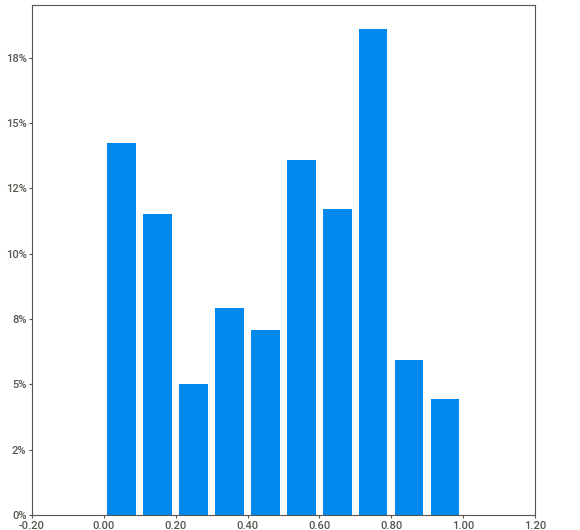
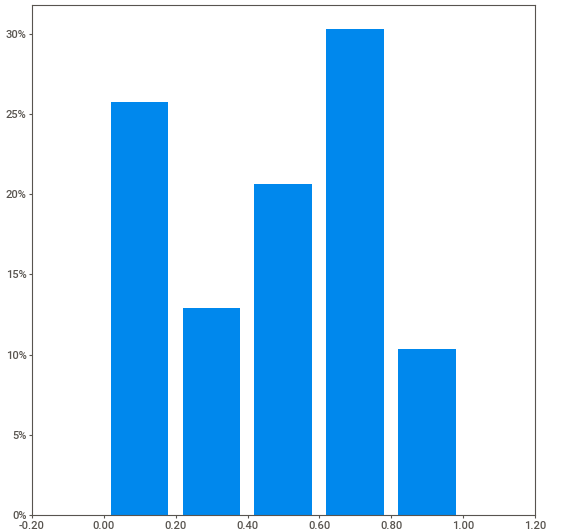
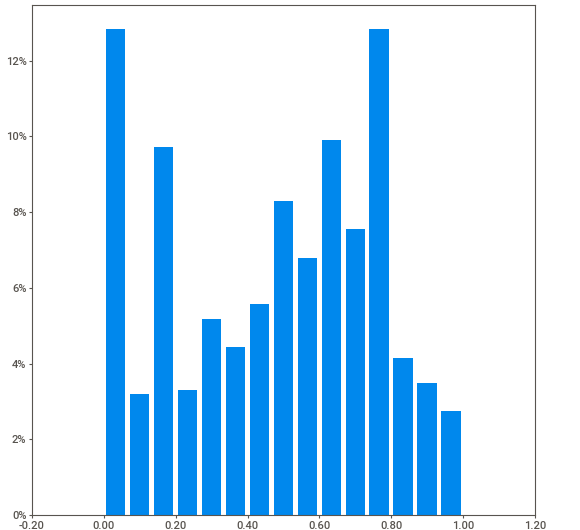
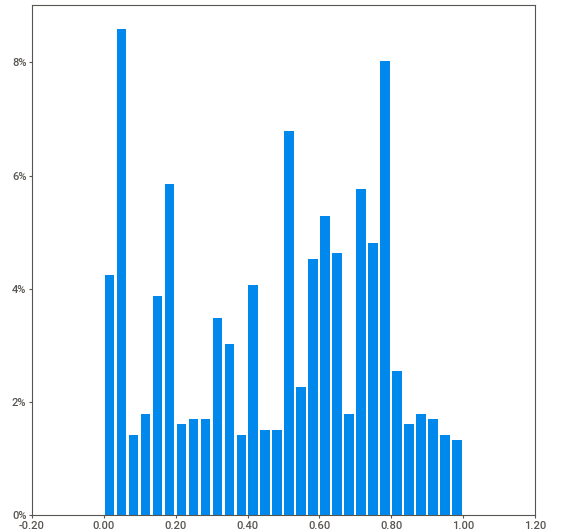
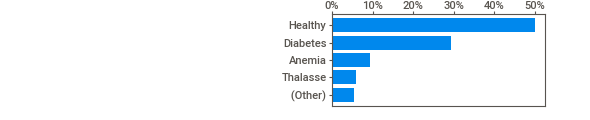
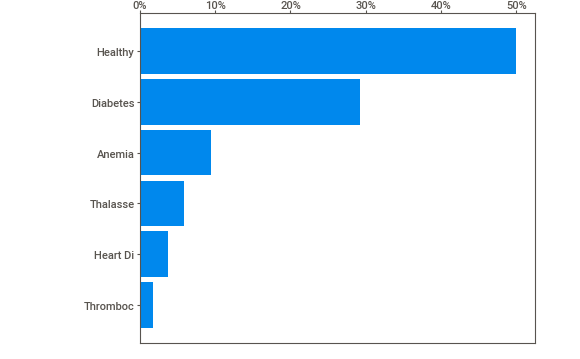
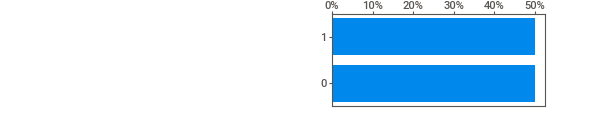
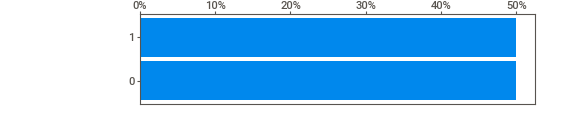
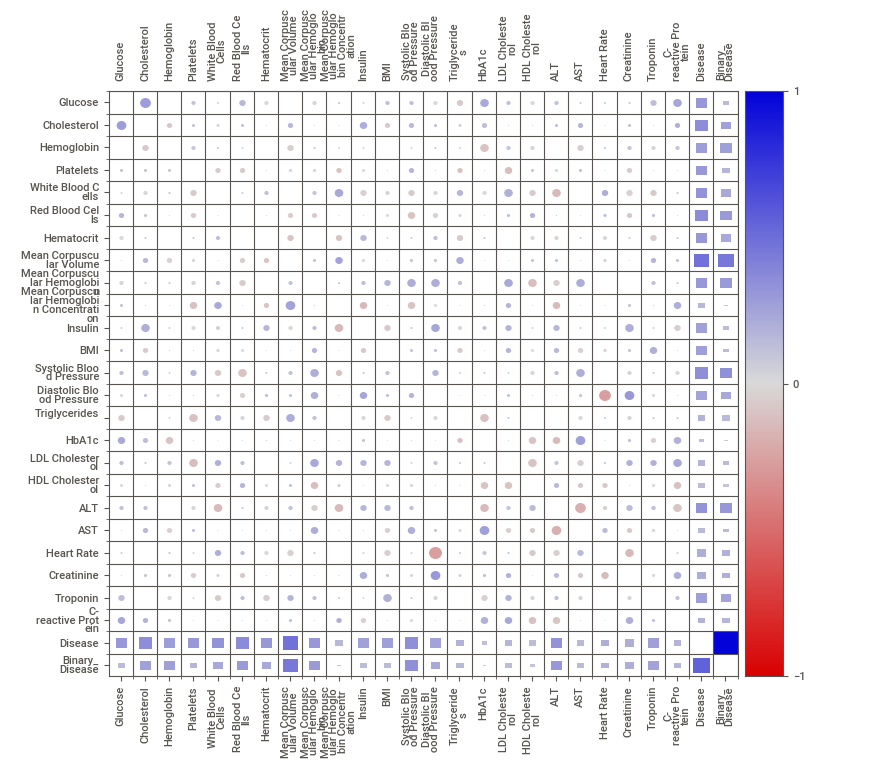
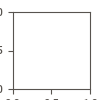

In [ ]:
my_report.show_notebook(  w=None,
                h=None,
                scale=None,
                layout='widescreen',
                filepath=None)

In [ ]:
profile = ProfileReport(df_balanced, title="Profiling Report")
profile.to_file("diagnosis_report_profiling.html")

In [ ]:
# Get numerical columns and exclude 'Binary_Disease' from the list
numerical_cols = df_balanced.columns[df_balanced.dtypes != 'object']
numerical_cols = numerical_cols.drop('Binary_Disease')
numerical_cols

Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein'],
      dtype='object')

## Outliers

In [ ]:
# Selecting numerical features (excluding the 'Disease' column)
numerical_features = df_balanced.select_dtypes(include=[np.number])

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = numerical_features.quantile(0.25)
Q3 = numerical_features.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the outlier threshold
threshold = 1.5

# Detect outliers
outliers = ((numerical_features < (Q1 - threshold * IQR)) | (numerical_features > (Q3 + threshold * IQR))).any(axis=1)

# Count the number of outliers
num_outliers = outliers.sum()
print("Number of outliers detected:", num_outliers)

# Display the outliers
print("\nOutlier rows:")
df_balanced[outliers]

Number of outliers detected: 0

Outlier rows:


Empty DataFrame
Columns: [Glucose, Cholesterol, Hemoglobin, Platelets, White Blood Cells, Red Blood Cells, Hematocrit, Mean Corpuscular Volume, Mean Corpuscular Hemoglobin, Mean Corpuscular Hemoglobin Concentration, Insulin, BMI, Systolic Blood Pressure, Diastolic Blood Pressure, Triglycerides, HbA1c, LDL Cholesterol, HDL Cholesterol, ALT, AST, Heart Rate, Creatinine, Troponin, C-reactive Protein, Disease, Binary_Disease]
Index: []

[0 rows x 26 columns]

## Boxplots

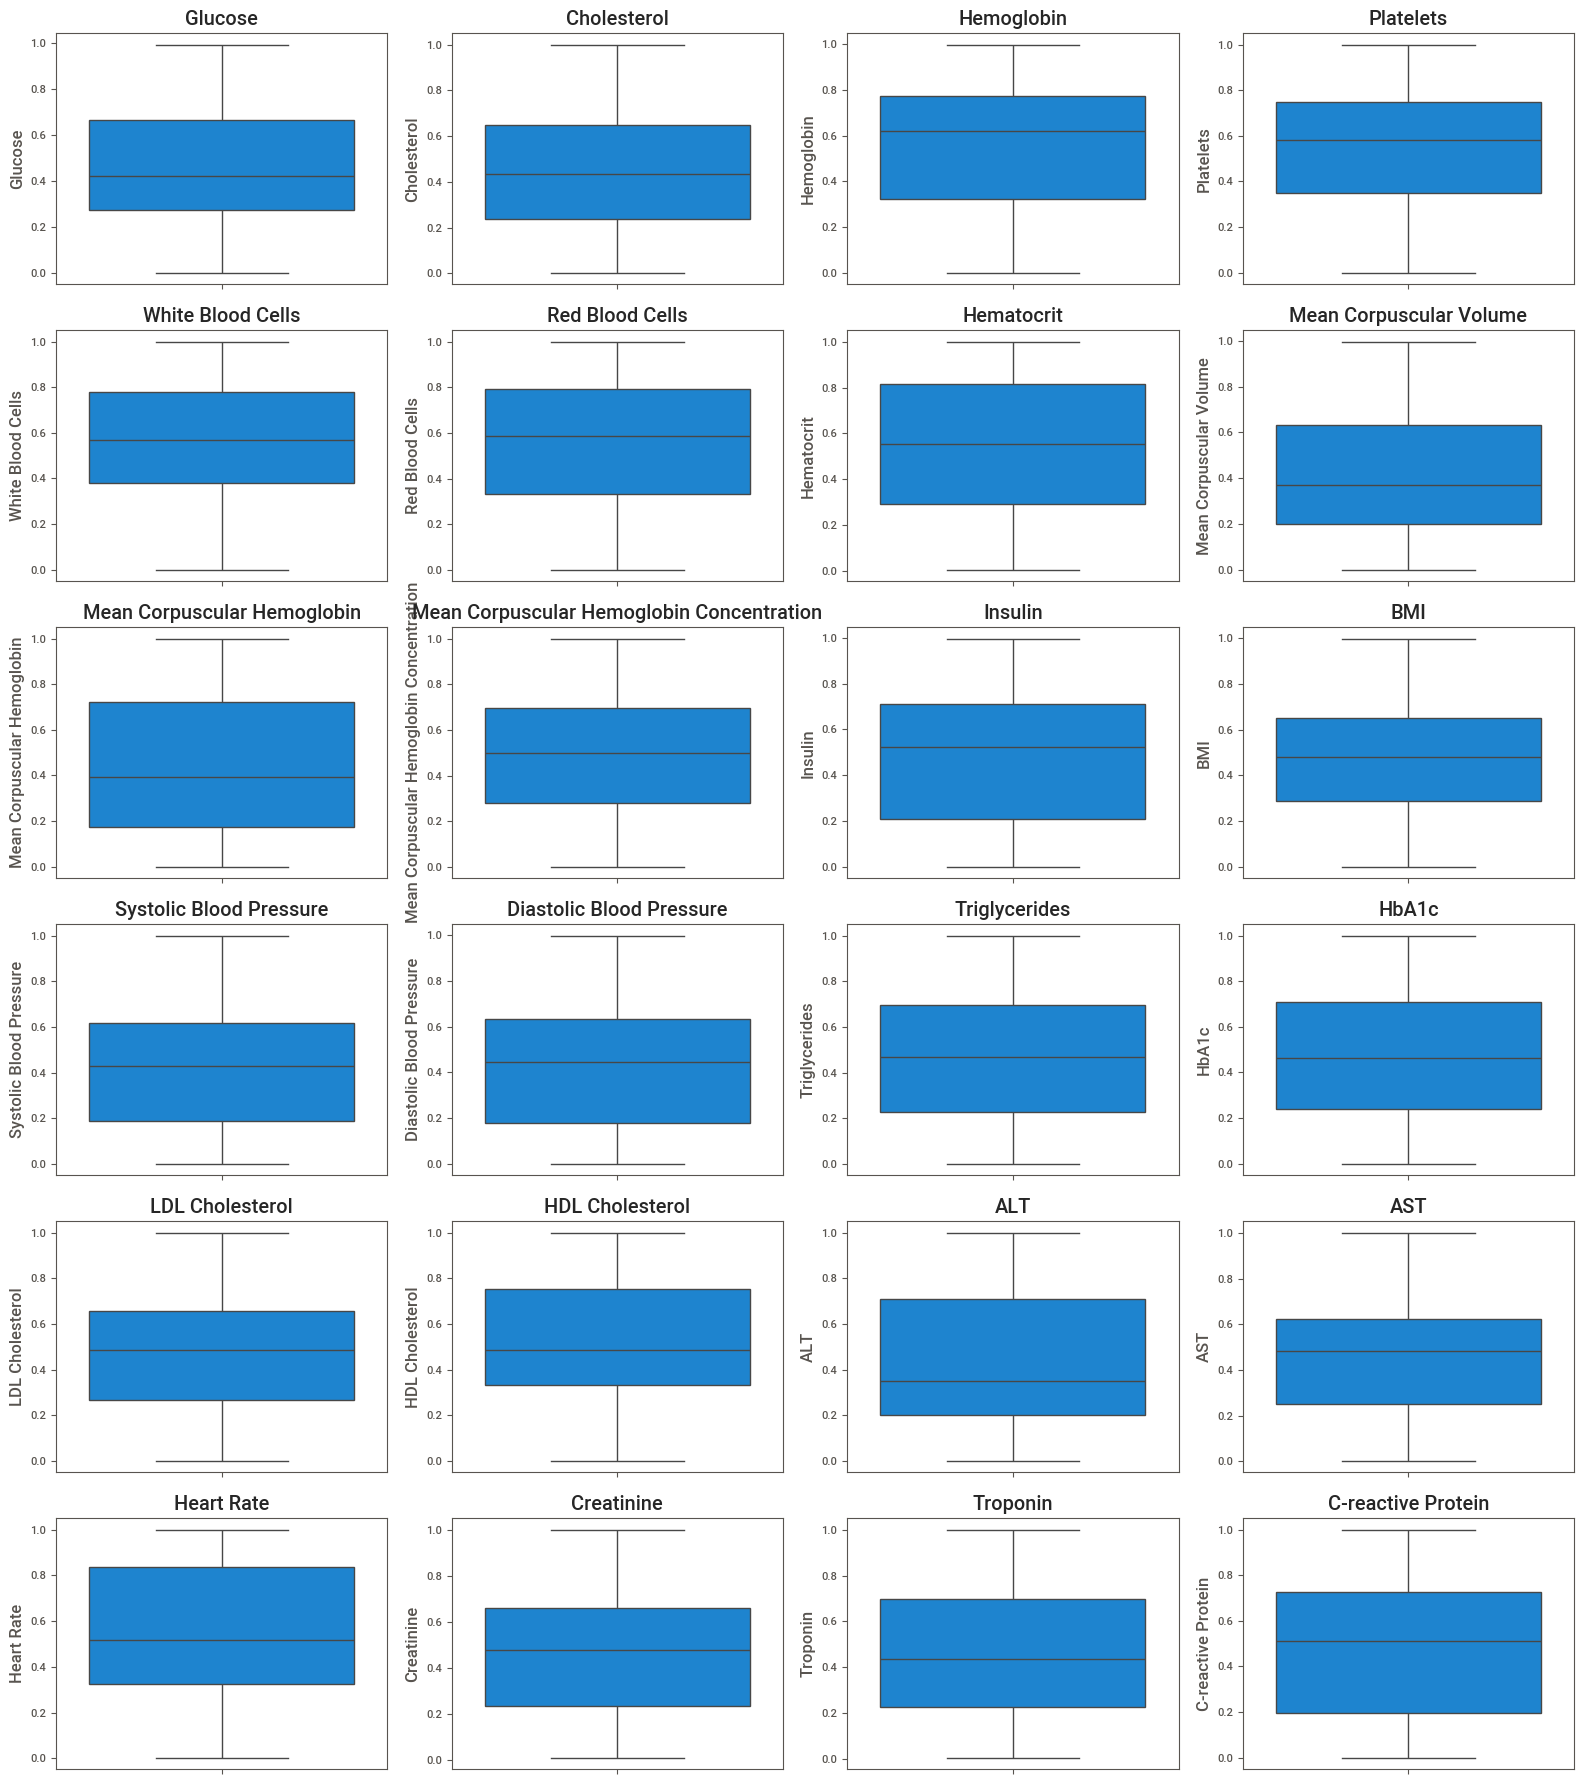

In [ ]:
# Box plots to visualize the distribution of each numerical feature
plt.figure(figsize=(16, 18))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(6, 4, i)
    sns.boxplot(df_balanced[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Correlation Matrix

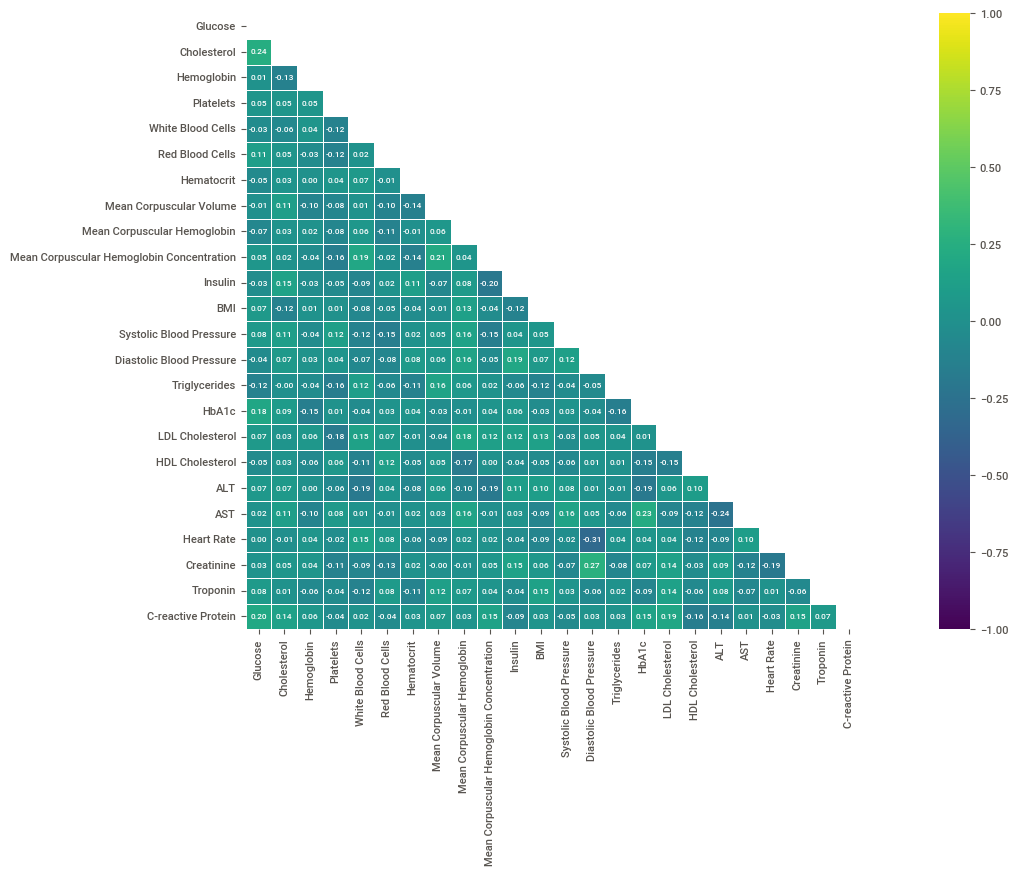

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_balanced.drop(["Disease", 'Binary_Disease'], axis=1).corr()

# Create a mask using numpy's triu function
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a masked heatmap
plt.figure(figsize = (20,8))
plt.rcParams.update({'font.size': 6})
sns.heatmap(correlation_matrix, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)
plt.show()

In [ ]:
df_balanced.head()

Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
1  0.121786     0.023058    0.944893   0.905372           0.507711   
2  0.452539     0.116135    0.544560   0.400640           0.294538   
3  0.136609     0.015605    0.419957   0.191487           0.081168   
4  0.176737     0.752220    0.971779   0.785286           0.443880   
5  0.898222     0.258706    0.933307   0.353082           0.373952   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
1         0.403033    0.164216                 0.307553   
2         0.382021    0.625267                 0.295122   
3         0.166214    0.073293                 0.668719   
4         0.439851    0.894991                 0.442159   
5         0.297138    0.900010                 0.985488   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
1                     0.207938                                   0.505562   
2                     0.868369                                   0.026808   
3                     0.125447                                   0.501051   
4                     0.257288                                   0.805987   
5                     0.679007                                   0.355774   

   ...  LDL Cholesterol  HDL Cholesterol       ALT       AST  Heart Rate  \
1  ...         0.652465         0.106961  0.942549  0.344261    0.666368   
2  ...         0.387332         0.421763  0.007186  0.506918    0.431704   
3  ...         0.040137         0.826721  0.265415  0.594148    0.225756   
4  ...         0.146294         0.221574  0.015280  0.567115    0.841412   
5  ...         0.529914         0.222687  0.772461  0.119994    0.894273   

   Creatinine  Troponin  C-reactive Protein   Disease  Binary_Disease  
1    0.659060  0.816982            0.401166  Diabetes               1  
2    0.417295  0.799074            0.779208  Thalasse               1  
3    0.490349  0.637061            0.354094    Anemia               1  
4    0.153350  0.794008            0.094970  Thalasse               1  
5    0.128124  0.379016            0.751438  Diabetes               1  

[5 rows x 26 columns]

## Modeling

In [ ]:
# Separate features (X) and target variable (y)
X = df_balanced.drop(columns=['Disease', 'Binary_Disease'])
y = df_balanced['Binary_Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42, probability=True),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}


Training and evaluating Logistic Regression...
Cross-validation scores for Logistic Regression: [0.89411765 0.85882353 0.87058824 0.89940828 0.87573964]
Mean accuracy: 0.8797354681517578
ROC-AUC score for Logistic Regression: 0.8782431131660796

Training and evaluating RandomForest...
Cross-validation scores for RandomForest: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0
ROC-AUC score for RandomForest: 1.0

Training and evaluating SVM...
Cross-validation scores for SVM: [0.99411765 1.         0.99411765 1.         0.99408284]
Mean accuracy: 0.9964636268708666
ROC-AUC score for SVM: 1.0

Training and evaluating Gradient Boosting...
Cross-validation scores for Gradient Boosting: [0.99411765 0.99411765 1.         0.99408284 0.98224852]
Mean accuracy: 0.9929133310128785
ROC-AUC score for Gradient Boosting: 1.0

Training and evaluating XGBoost...
Cross-validation scores for XGBoost: [0.99411765 0.99411765 0.98823529 1.         0.99408284]
Mean accuracy: 0.9941106856943961
ROC-AUC score for XGBoost: 

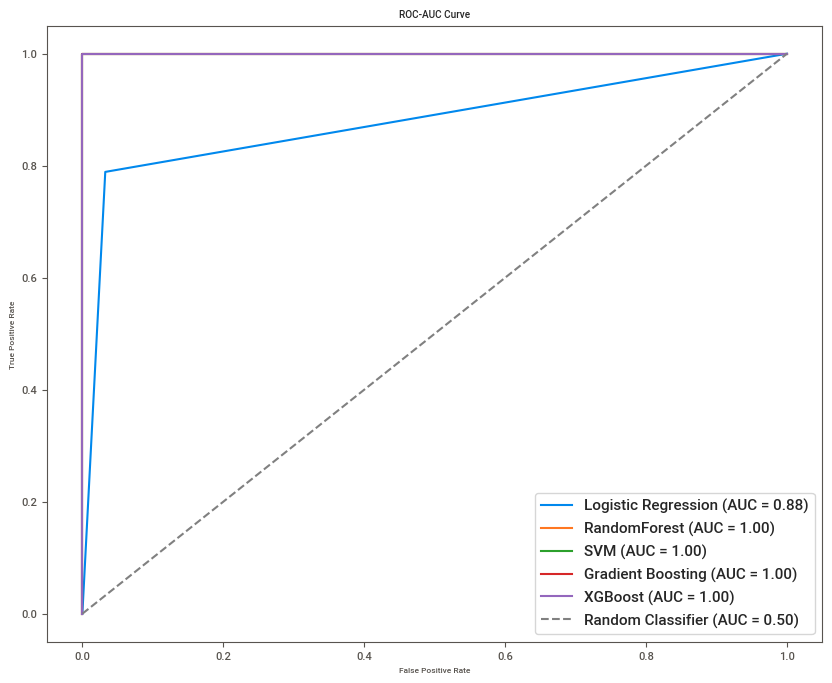

In [ ]:
# Perform cross-validation and plot ROC-AUC curves
plt.figure(figsize=(10, 8))
for name, model in models.items():
    print(f"\nTraining and evaluating {name}...")
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Cross-validation scores for {name}: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean()}")

    # Make cross-validated predictions
    if name == "Logistic Regression":
        y_cv_pred = cross_val_predict(model, X_train, y_train, cv=5)
    else:
        y_cv_pred = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')[:, 1]

    fpr, tpr, thresholds = roc_curve(y_train, y_cv_pred)

    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(y_train, y_cv_pred)
    print(f"ROC-AUC score for {name}: {roc_auc}")

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot ROC curve for random classifier (baseline)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()

## Model Evaluation

In [ ]:
# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    # Train the model
    model.fit(X_train, y_train)

    # Predict the target variable on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    print(f"\nEvaluation for {name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Training Logistic Regression...

Evaluation for Logistic Regression:
Accuracy: 0.8962264150943396

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.90        99
           1       0.97      0.83      0.90       113

    accuracy                           0.90       212
   macro avg       0.90      0.90      0.90       212
weighted avg       0.91      0.90      0.90       212


Confusion Matrix:
[[96  3]
 [19 94]]


Training RandomForest...

Evaluation for RandomForest:
Accuracy: 0.9952830188679245

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        99
           1       1.00      0.99      1.00       113

    accuracy                           1.00       212
   macro avg       0.99      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212


Confusion Matrix:
[[ 99   0]
 [  1 112]]


Training SVM...

Evaluation for 

## Hyperparameter Tuning

In [ ]:
# Hyperparameter tuning for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1]
}

xgb_model = XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}


In [ ]:
# Train the best model with the optimal hyperparameters
best_xgb_model = XGBClassifier(**best_params, random_state=42)
best_xgb_model.fit(X_train, y_train)

# Evaluate the best model
y_pred = best_xgb_model.predict(X_test)
print("\nEvaluation for the best XGBoost model:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, best_xgb_model.predict_proba(X_test)[:, 1]))


Evaluation for the best XGBoost model:
Accuracy: 0.9952830188679245

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        99
           1       1.00      0.99      1.00       113

    accuracy                           1.00       212
   macro avg       0.99      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212


Confusion Matrix:
 [[ 99   0]
 [  1 112]]

ROC-AUC Score: 1.0


## Feature importance

Feature importance indicates which features are the most significant in predicting the target variable in the trained XGBoost model. The features are ranked based on their importance scores, which reflect the contribution of each feature to the model's predictions.

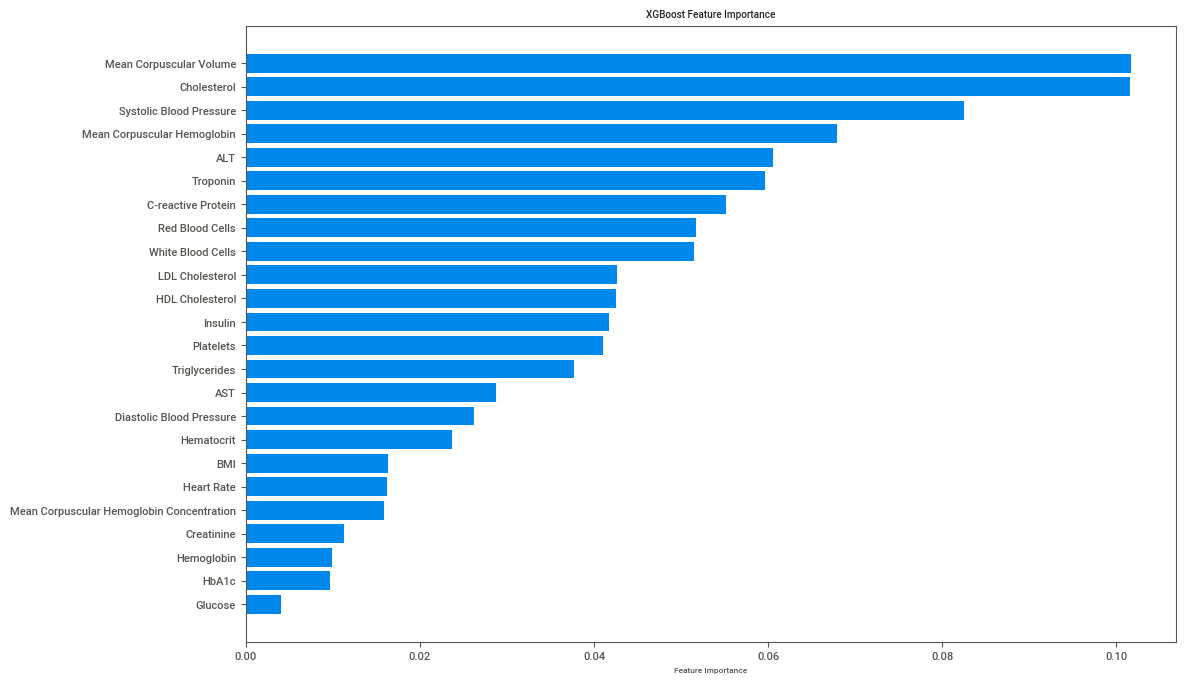

In [ ]:
# Feature importance
xgb_importances = best_xgb_model.feature_importances_
sorted_idx = np.argsort(xgb_importances)[::1]
top_features = X.columns[sorted_idx]

plt.figure(figsize=(12, 8))
plt.barh(top_features, xgb_importances[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show()

## SHAP values

SHAP (SHapley Additive exPlanations) values provide a way to interpret the impact of each feature on the model's predictions for each instance. SHAP values are calculated based on game theory and help explain the contribution of each feature to the prediction.

  0%|          | 0/212 [00:00<?, ?it/s]

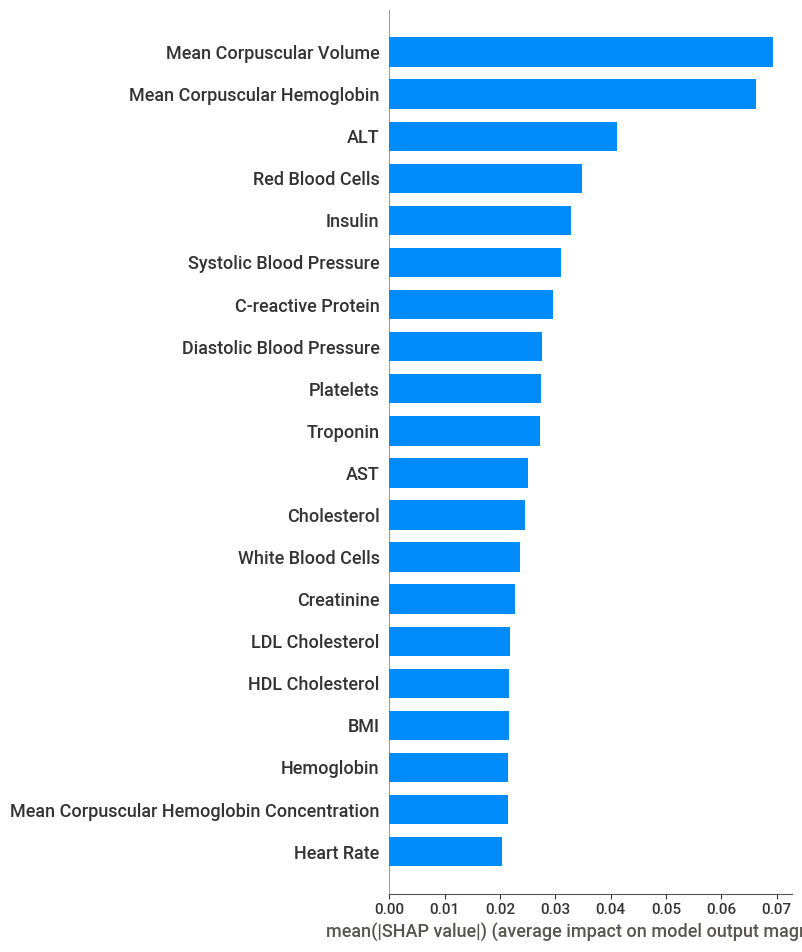

In [ ]:
# SHAP values using KernelExplainer
background = X_train.sample(n=100, random_state=42)
explainer = shap.KernelExplainer(lambda x: best_xgb_model.predict(x), background)
shap_values = explainer.shap_values(X_test, nsamples=100)

shap.summary_plot(shap_values, X_test, plot_type="bar")

**Comparison and Interpretation**

While both feature importance and SHAP values highlight key features, SHAP values provide a more nuanced understanding of each feature's impact on individual predictions.

The overlapping features in both lists validate their significance in predicting the target variable. Notably, features like Mean Corpuscular Volume, Mean Corpuscular Hemoglobin, ALT, and Red Blood Cells are consistently ranked highly in both metrics, underscoring their critical role in disease diagnosis.

In [ ]:
# Validate the model's predict method
sample_input = X_test.iloc[0].values.reshape(1, -1)
print(best_model.predict(sample_input))

[0]


## Save Model

In [ ]:
# Save the trained model using pickle
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(best_xgb_model, file)